In [1]:
from __future__ import print_function
from __future__ import division
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath=os.path.abspath(os.getcwd())+"\\feature_matrix\\Combined Data CSV - Corrected.csv" # Code assumes it is found in Postural_sway_measures / Change name of csv file as needed
data_diagnosis=pd.read_csv(filepath,sep=',')
data_diagnosis['sex']=(data_diagnosis['sex'] == 'male').astype(int) # 1 for male and 0 for female

filepath=os.path.abspath(os.getcwd())+"\\feature_matrix\\Full Calculated Feature Matrix - Corrected.csv"
data_features=pd.read_csv(filepath,sep=',')
for i in range(len(data_features.index)):
    data_features.iloc[i,0]=(data_features.iloc[i,0]).rstrip('.xlsx')
    
data=data_diagnosis.set_index('name').join(data_features.set_index('FileName'))
data

,sex,age,disease name,layer 1,layer 2,layer 3,Open eye pressure center position (left and right),Center position of the eye pressure (front and back),Eye circumference area,Eye opening effective value area,...,EC_Hcap,EC_Hcml,EC_Hsrd,EC_Hsap,EC_Hsml,EC_Hlrd,EC_Hlap,EC_Hlml,EC_meanCOPy,EC_meanCOPx
AIpt1,1,63,Meniere's disease,2,3,5,-0.301946,-2.436221,3.678812,1.765198,...,-0.088069,-0.193956,0.710533,0.794348,0.750105,-0.025332,-0.088030,-0.026816,-1.289900,-0.470905
AIpt10,1,43,Upper semicircular canal space syndrome (suspe...,2,3,5,1.110603,-2.546055,5.525864,2.931303,...,-0.010877,-0.050092,0.886429,0.898384,0.902409,-0.055991,-0.037583,0.252131,-1.205289,1.256187
AIpt100,1,49,Lateral medullary syndrome,2,3,6,0.144791,-1.899829,5.564807,2.115183,...,-0.346515,-0.230871,0.791349,0.869788,0.853686,0.092514,0.197002,-0.053835,-1.272709,-0.173224
AIpt101,1,49,Lateral medullary syndrome,2,3,6,-1.256492,-2.176461,5.858314,2.380948,...,-0.258764,-0.079537,0.802165,0.862788,0.848822,0.028067,0.059332,-0.090908,-1.914188,-0.510466
AIpt102,1,49,Lateral medullary syndrome,2,3,6,0.198467,-2.268007,4.735147,1.914402,...,-0.325197,-0.079657,0.831283,0.896898,0.840945,0.010201,0.123216,-0.001562,-1.497318,-0.528104
AIpt103,1,64,Unknown cause,2,4,4,-0.891852,-1.214771,2.468962,1.402963,...,-0.405107,-0.524789,0.849648,0.902635,0.871354,0.198468,0.265490,0.122108,-2.578620,-0.945412
AIpt104,0,20,Dizziness,2,3,5,0.956754,-4.747497,3.275628,1.638848,...,-0.744211,-0.396254,0.776699,0.836602,0.847006,0.016787,0.333007,0.114489,-2.579915,0.888741
AIpt105,0,82,Unknown cause,2,4,4,0.384771,-0.235596,2.459797,0.925849,...,-0.393366,-0.115568,0.807859,0.840897,0.873441,0.076991,0.217764,-0.021679,-1.147456,0.871528
AIpt106,0,58,Epilepsy,2,4,4,-0.073570,-0.407359,9.895777,3.162718,...,-0.458719,-0.282224,0.677477,0.763282,0.807832,0.042349,0.021270,0.004882,-0.407334,-0.073551
AIpt107,0,33,Vestibular neuritis,2,3,5,1.693554,-0.317646,2.699602,1.336714,...,-0.462877,-0.308698,0.796329,0.882591,0.861998,-0.021796,0.174121,0.060487,-0.510026,1.788022


## Predictors 

In [2]:
# All layers in one (Value can be 1/4/5/6)
data.insert(6,"all layers",data['layer 3'])

# Layers 1+2 (Value can be 1/3/4)
data.insert(6,"layers 1+2",data['layer 2'])

# layer 1: [0]="1" / [1]="2" 
data['layer 1']=(data['layer 1'] == 2).astype(int) # 1 for "2" in layer1 and 0 for "1" in layer1

# layer 2 (assumes balance issue present): [-1]="1" / [0]="3" / [1]="4"
for i in range(len(data)):
    if(data['layer 2'][i]==1):
        data['layer 2'][i]=-1
    if(data['layer 2'][i]==3):
        data['layer 2'][i]=0
    if(data['layer 2'][i]==4):
        data['layer 2'][i]=1

# layer 3 (assumes vestibular balance issue present): [-1]="1" / [0]="5" / [1]="6" / [-1]="4"
for i in range(len(data)):
    if(data['layer 3'][i]==1 or data['layer 3'][i]==4):
        data['layer 3'][i]=-1
    if(data['layer 3'][i]==5):
        data['layer 3'][i]=0
    if(data['layer 3'][i]==6):
        data['layer 3'][i]=1

## Compiling results
final_results=[]

## Features
first_calculated_feature=data.columns.get_loc("EO_MDISTrd")
first_given_feature=data.columns.get_loc("Open eye pressure center position (left and right)")
all_features=list(data.columns[0:2])+list(data.columns[first_calculated_feature:]) # all (calculated) features, not including the diagnosis
features=all_features[:]
data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:

,sex,age,disease name,layer 1,layer 2,layer 3,layers 1+2,all layers,Open eye pressure center position (left and right),Center position of the eye pressure (front and back),...,EC_Hcap,EC_Hcml,EC_Hsrd,EC_Hsap,EC_Hsml,EC_Hlrd,EC_Hlap,EC_Hlml,EC_meanCOPy,EC_meanCOPx
AIpt1,1,63,Meniere's disease,1,0,0,3,5,-0.301946,-2.436221,...,-0.088069,-0.193956,0.710533,0.794348,0.750105,-0.025332,-0.088030,-0.026816,-1.289900,-0.470905
AIpt10,1,43,Upper semicircular canal space syndrome (suspe...,1,0,0,3,5,1.110603,-2.546055,...,-0.010877,-0.050092,0.886429,0.898384,0.902409,-0.055991,-0.037583,0.252131,-1.205289,1.256187
AIpt100,1,49,Lateral medullary syndrome,1,0,1,3,6,0.144791,-1.899829,...,-0.346515,-0.230871,0.791349,0.869788,0.853686,0.092514,0.197002,-0.053835,-1.272709,-0.173224
AIpt101,1,49,Lateral medullary syndrome,1,0,1,3,6,-1.256492,-2.176461,...,-0.258764,-0.079537,0.802165,0.862788,0.848822,0.028067,0.059332,-0.090908,-1.914188,-0.510466
AIpt102,1,49,Lateral medullary syndrome,1,0,1,3,6,0.198467,-2.268007,...,-0.325197,-0.079657,0.831283,0.896898,0.840945,0.010201,0.123216,-0.001562,-1.497318,-0.528104
AIpt103,1,64,Unknown cause,1,1,-1,4,4,-0.891852,-1.214771,...,-0.405107,-0.524789,0.849648,0.902635,0.871354,0.198468,0.265490,0.122108,-2.578620,-0.945412
AIpt104,0,20,Dizziness,1,0,0,3,5,0.956754,-4.747497,...,-0.744211,-0.396254,0.776699,0.836602,0.847006,0.016787,0.333007,0.114489,-2.579915,0.888741
AIpt105,0,82,Unknown cause,1,1,-1,4,4,0.384771,-0.235596,...,-0.393366,-0.115568,0.807859,0.840897,0.873441,0.076991,0.217764,-0.021679,-1.147456,0.871528
AIpt106,0,58,Epilepsy,1,1,-1,4,4,-0.073570,-0.407359,...,-0.458719,-0.282224,0.677477,0.763282,0.807832,0.042349,0.021270,0.004882,-0.407334,-0.073551
AIpt107,0,33,Vestibular neuritis,1,0,0,3,5,1.693554,-0.317646,...,-0.462877,-0.308698,0.796329,0.882591,0.861998,-0.021796,0.174121,0.060487,-0.510026,1.788022


# Sanity Check

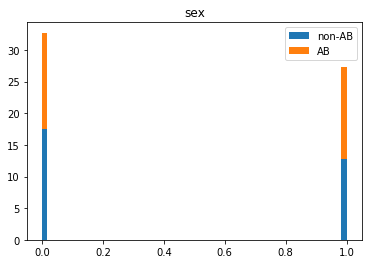

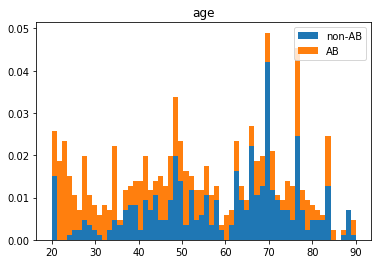

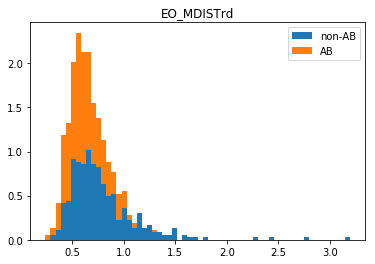

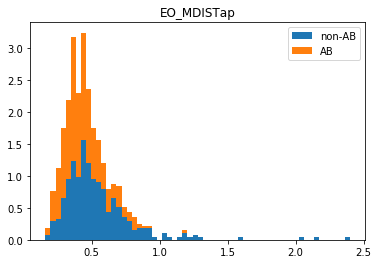

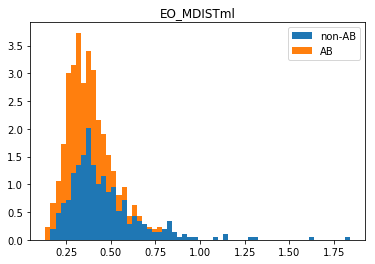

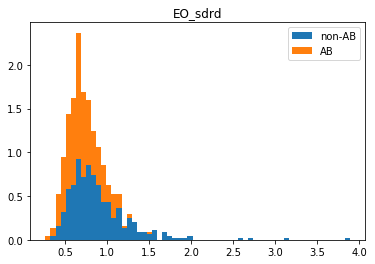

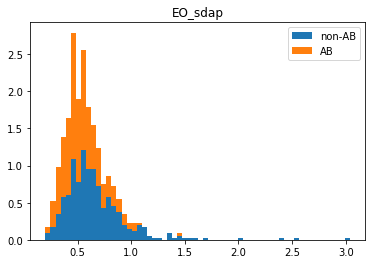

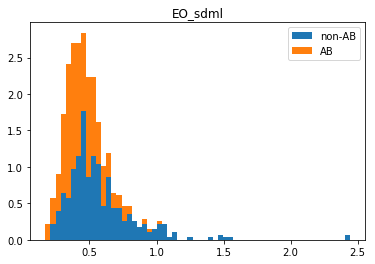

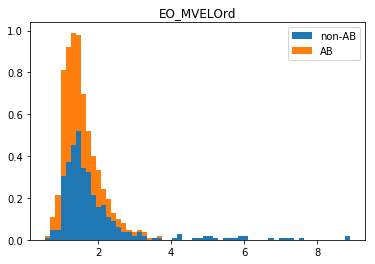

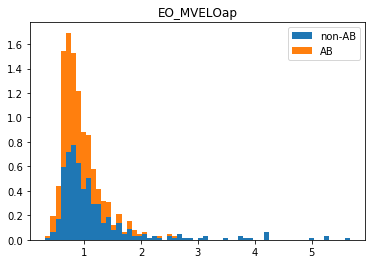

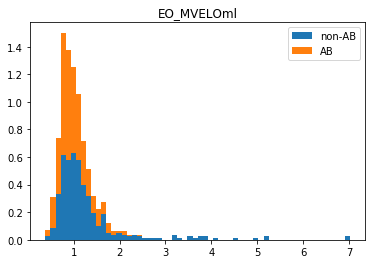

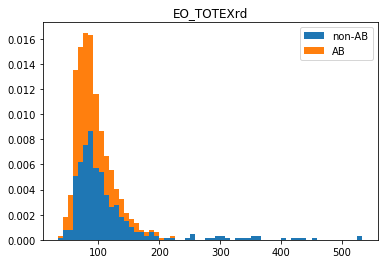

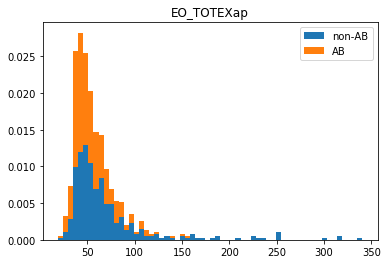

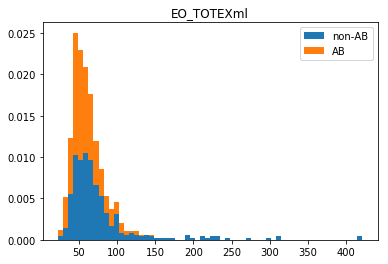

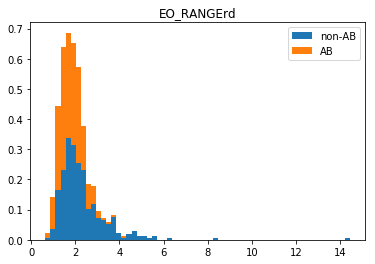

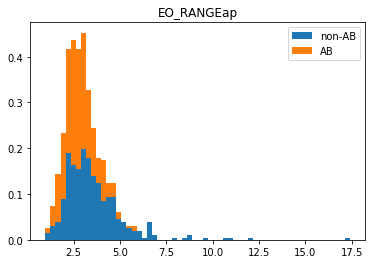

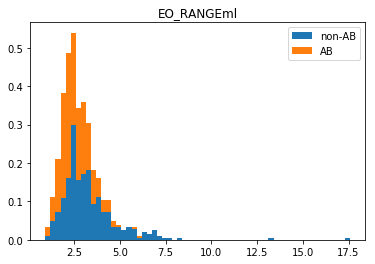

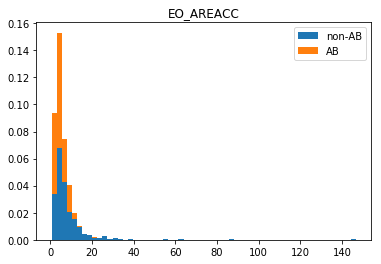

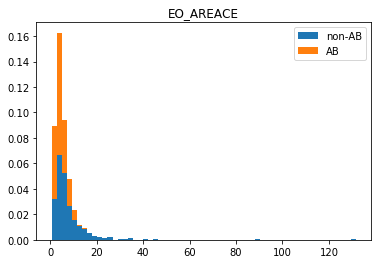

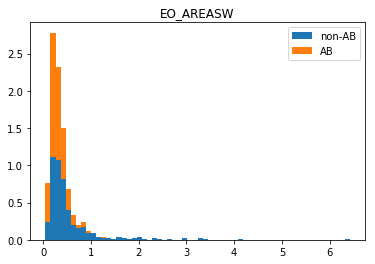

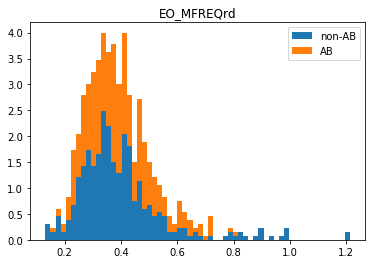

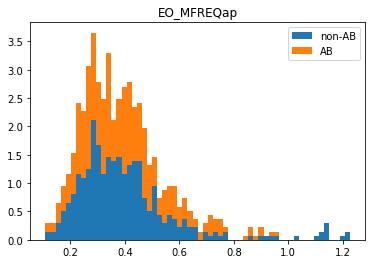

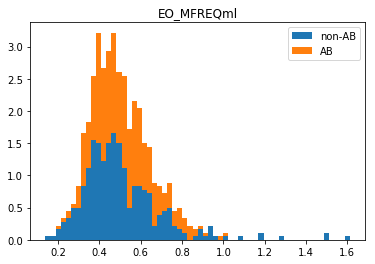

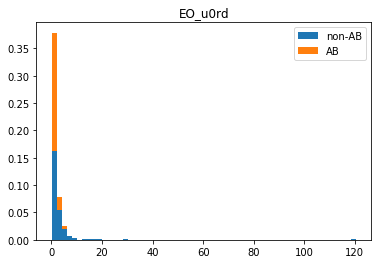

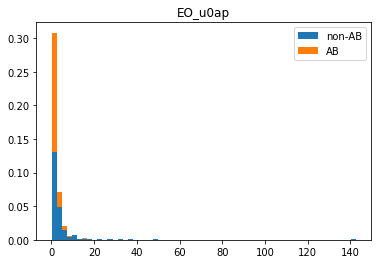

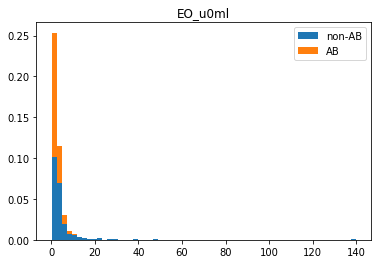

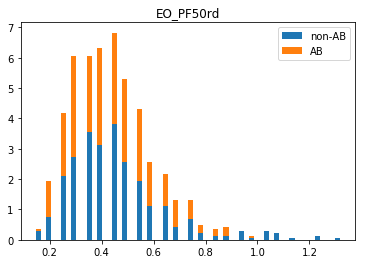

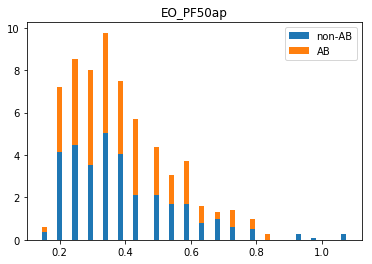

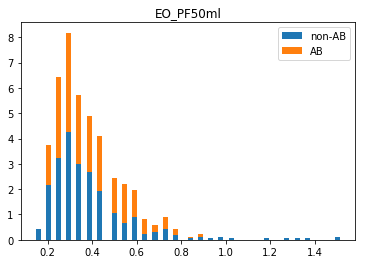

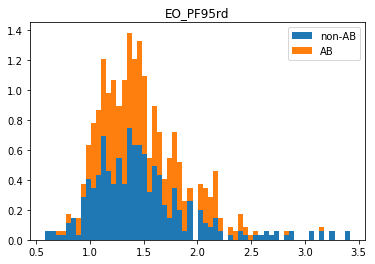

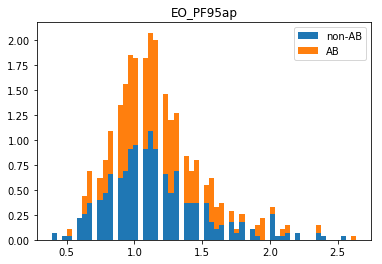

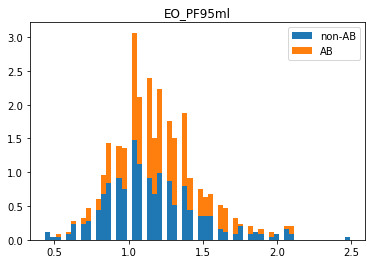

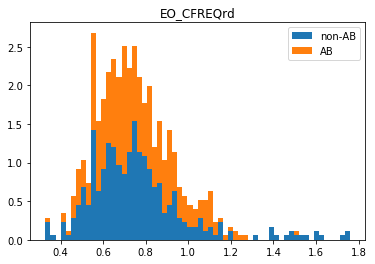

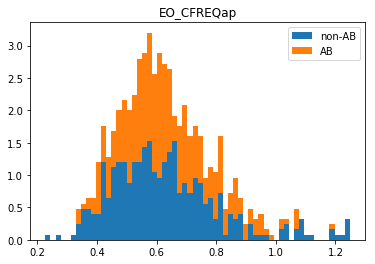

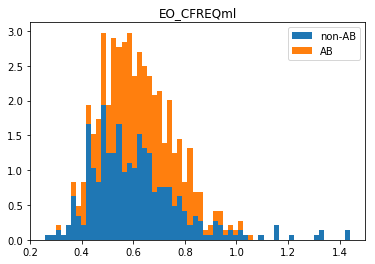

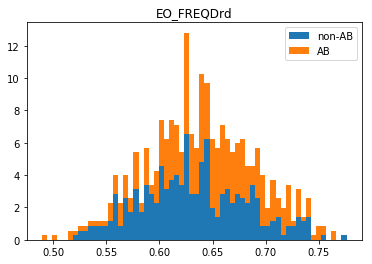

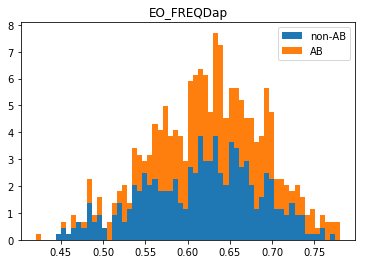

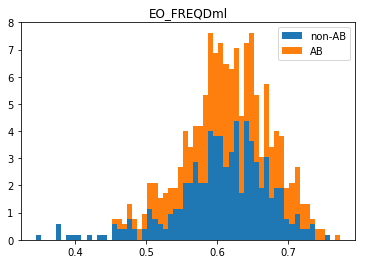

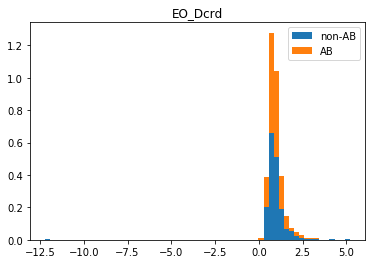

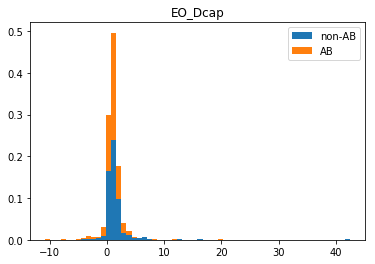

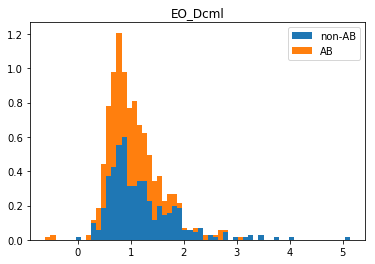

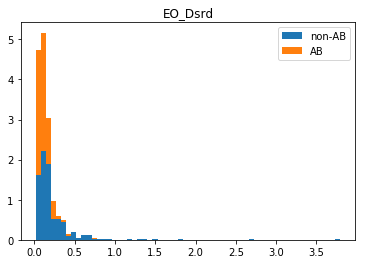

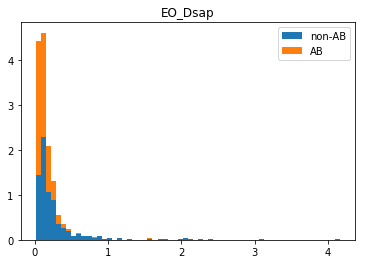

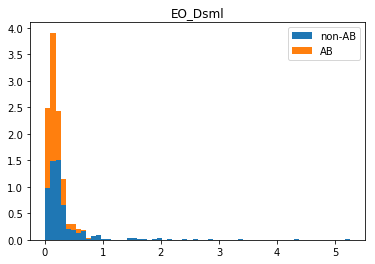

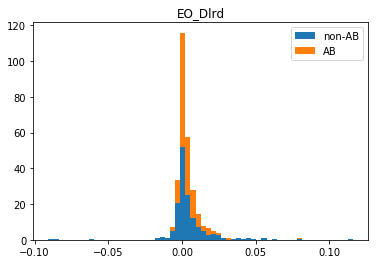

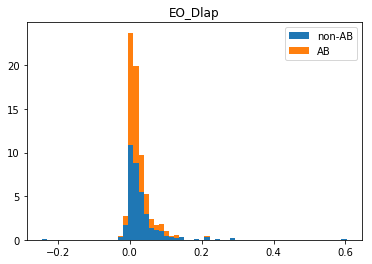

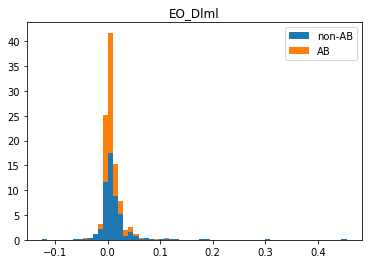

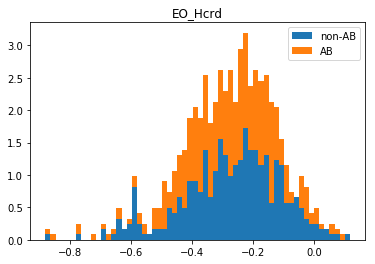

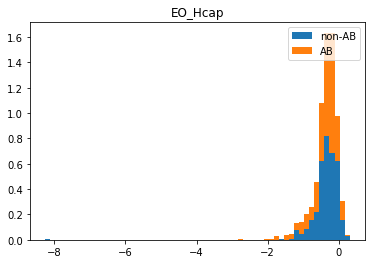

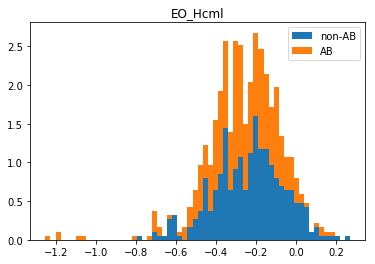

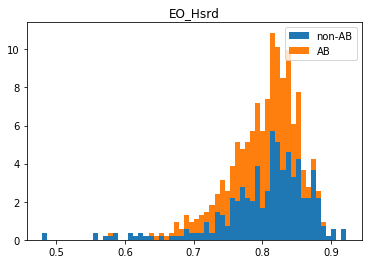

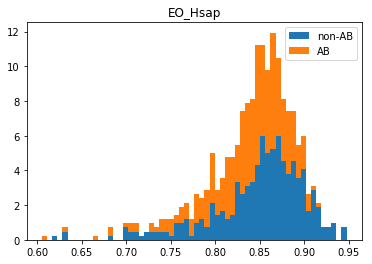

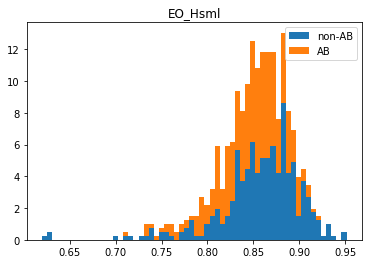

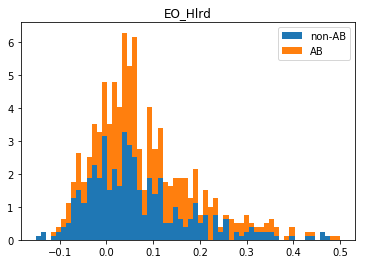

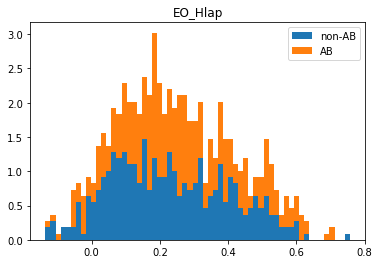

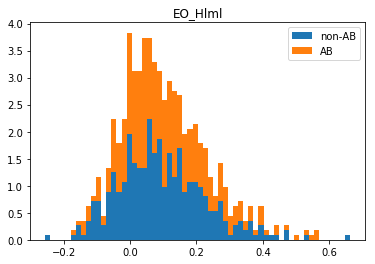

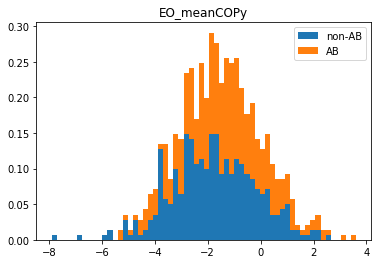

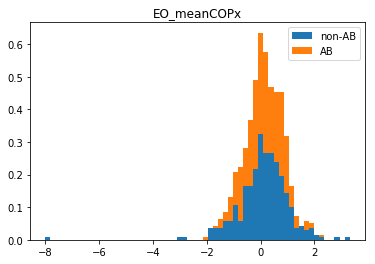

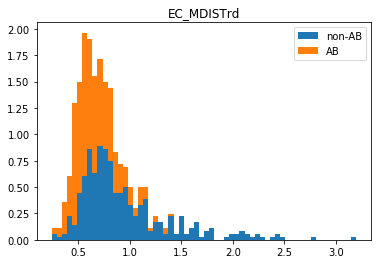

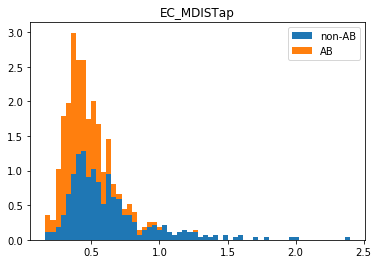

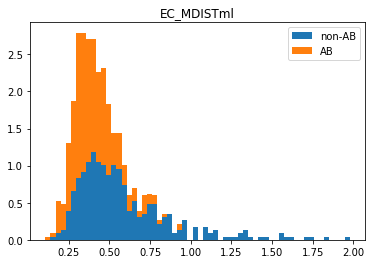

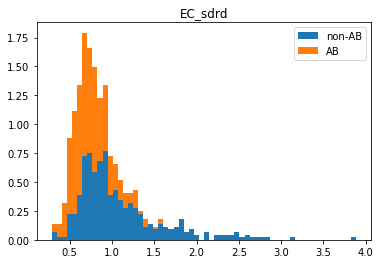

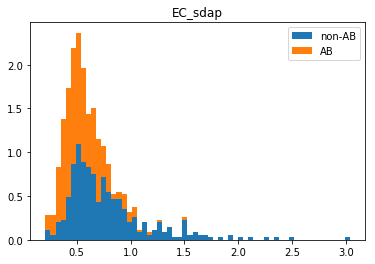

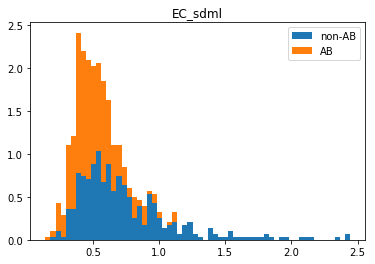

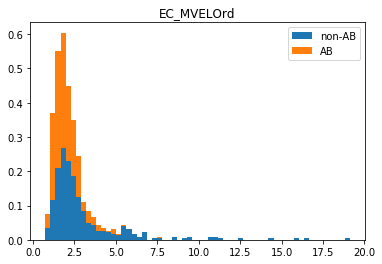

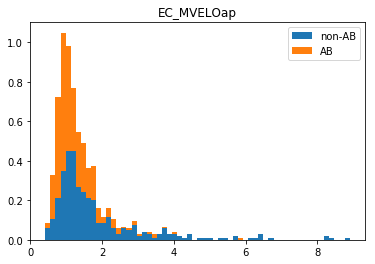

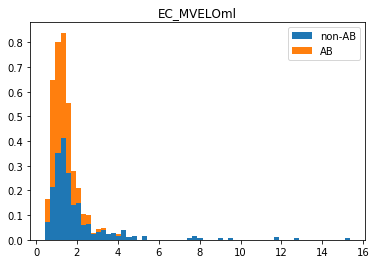

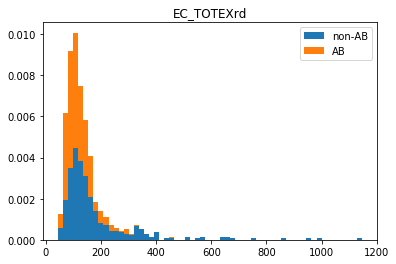

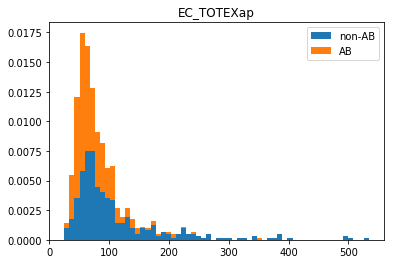

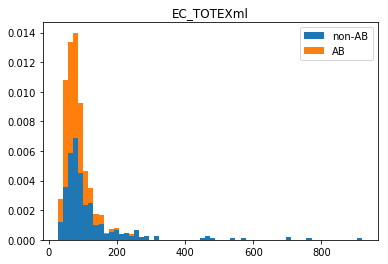

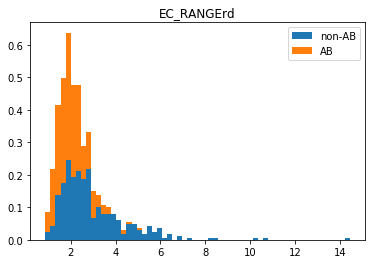

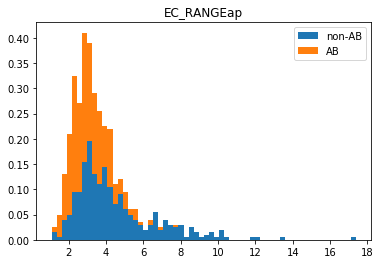

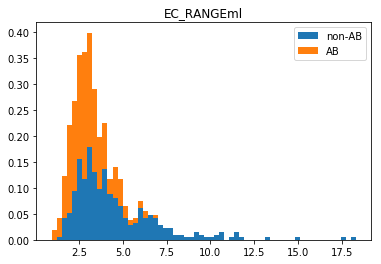

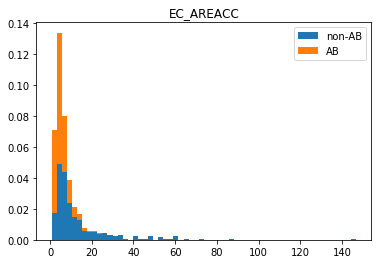

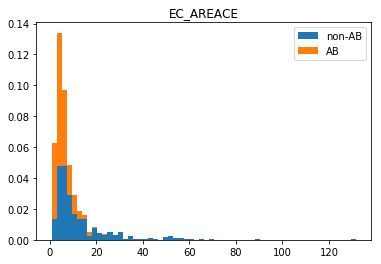

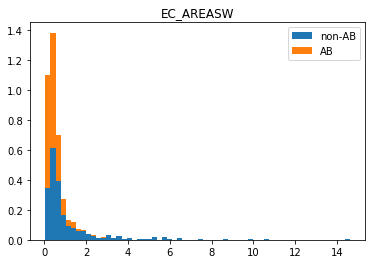

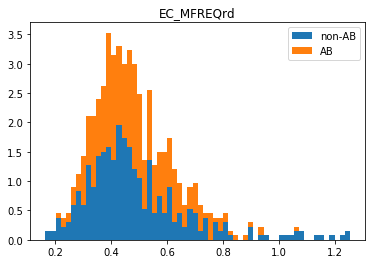

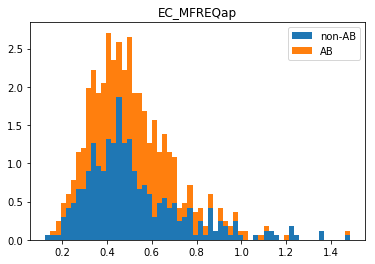

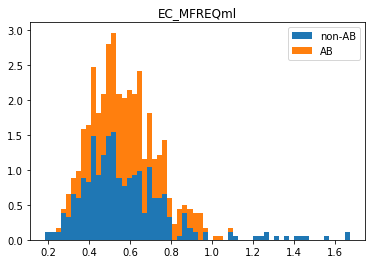

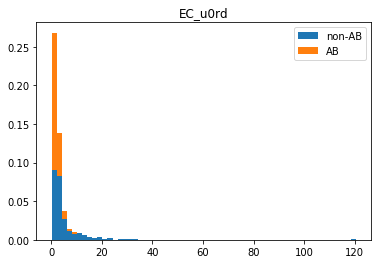

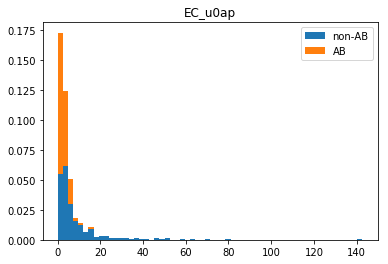

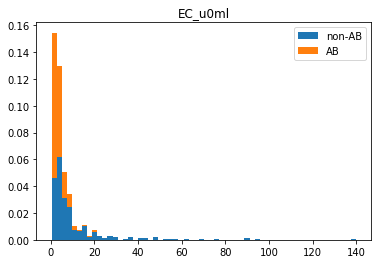

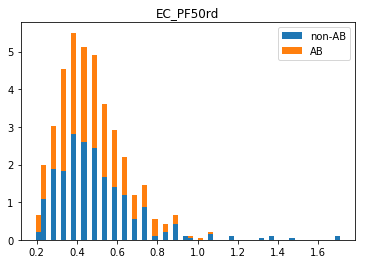

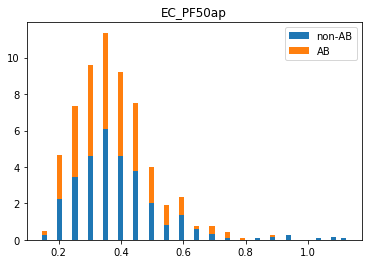

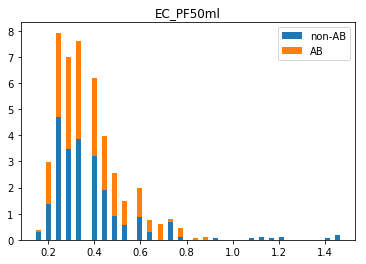

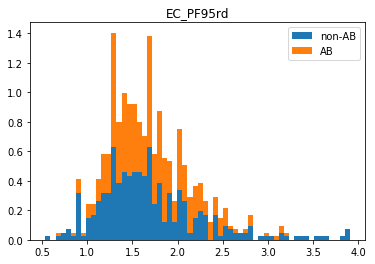

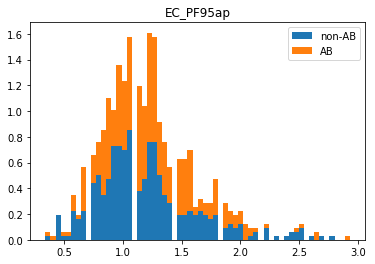

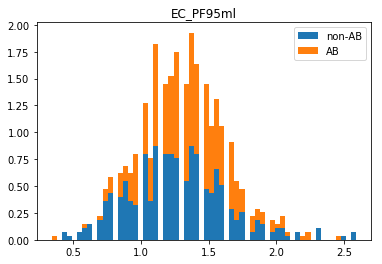

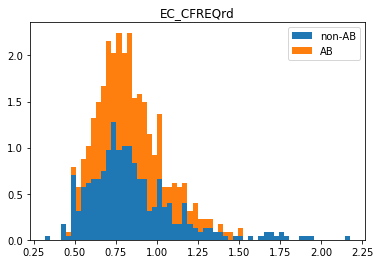

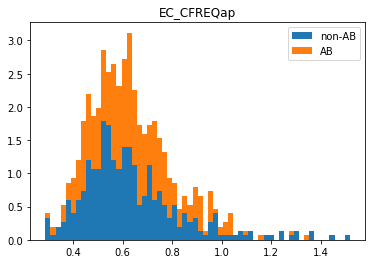

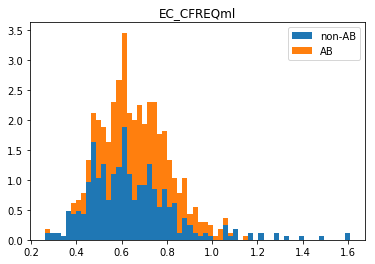

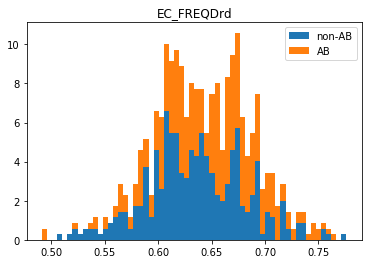

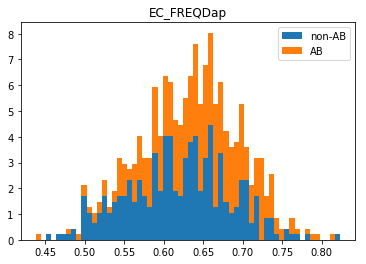

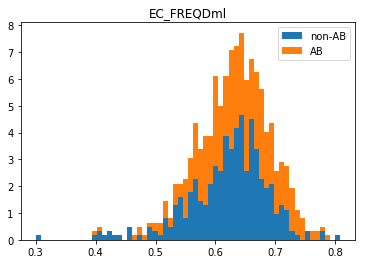

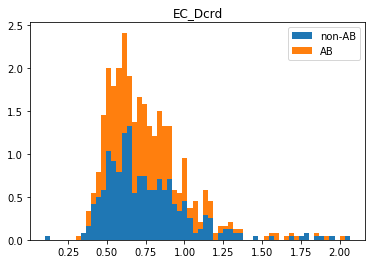

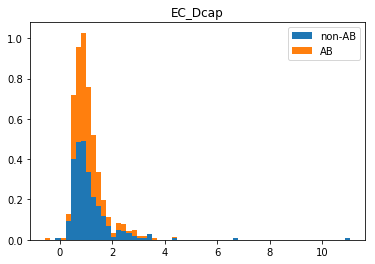

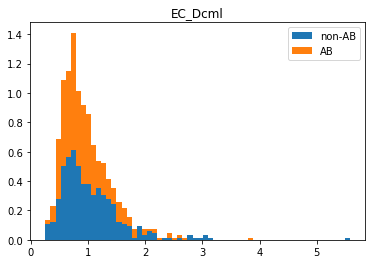

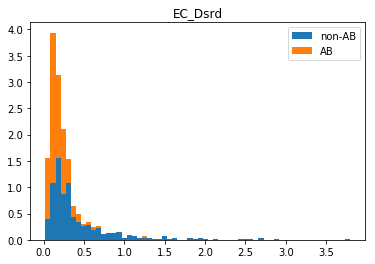

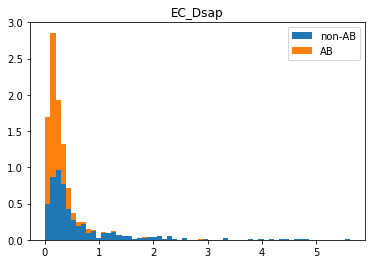

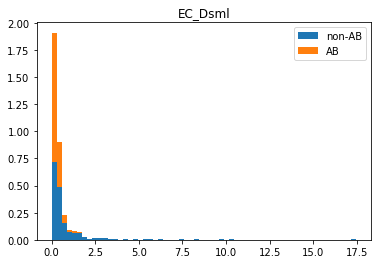

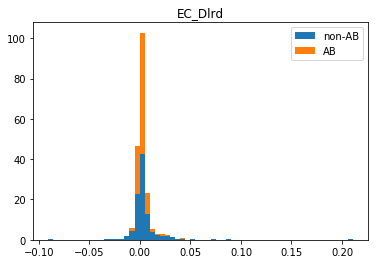

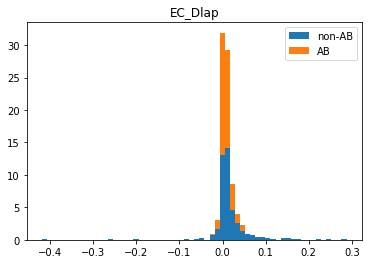

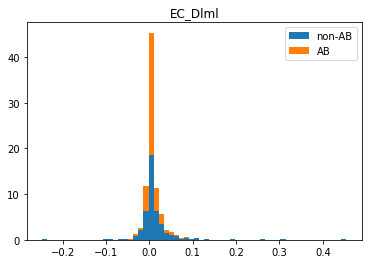

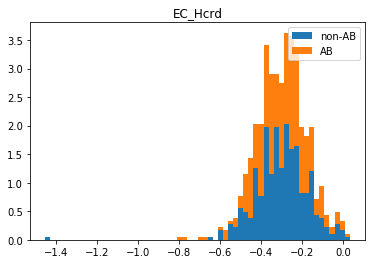

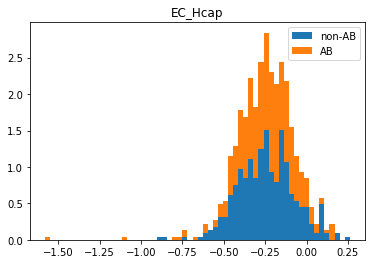

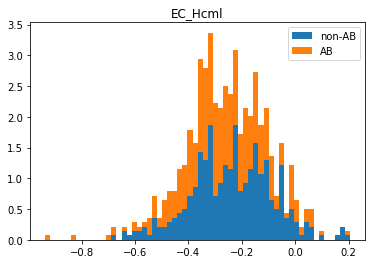

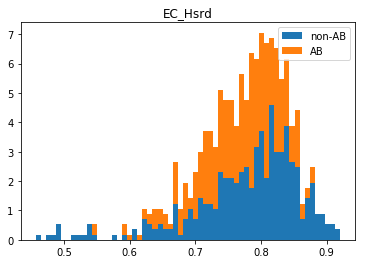

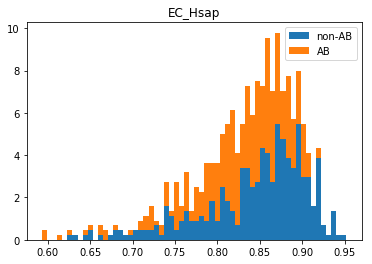

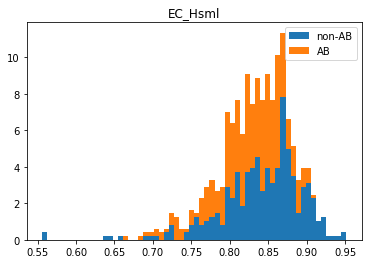

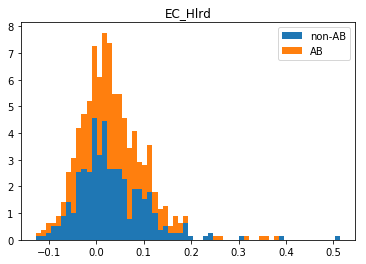

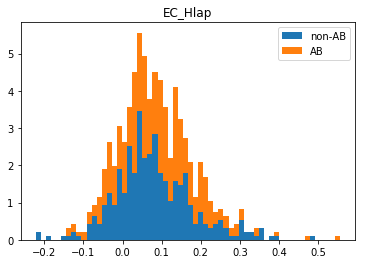

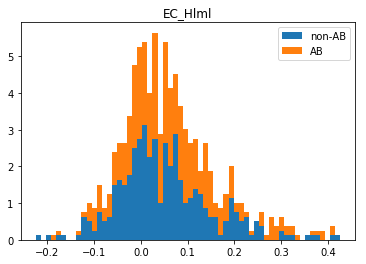

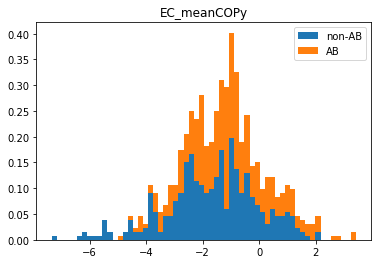

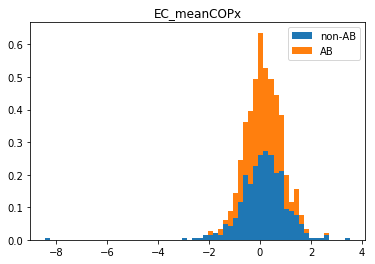

In [3]:
n_bins=60
colors = ['non-AB', 'AB']
for i in range(len(features)):
    x=[data[features[i]][0:371],data[features[i]][371:]]
    plt.hist(x, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(features[i])
    plt.show()

In [4]:
# Sanity Check 
bad_values=[]
for i in range(len(features)-3):
    for j in range(len(data)):
        if (np.isnan(data.iloc[j,i+9]) or np.isinf(data.iloc[j,i+9])):
            bad_values=bad_values+[[j,i+9]]
print(bad_values)

[]


# Correlations (Spearman)

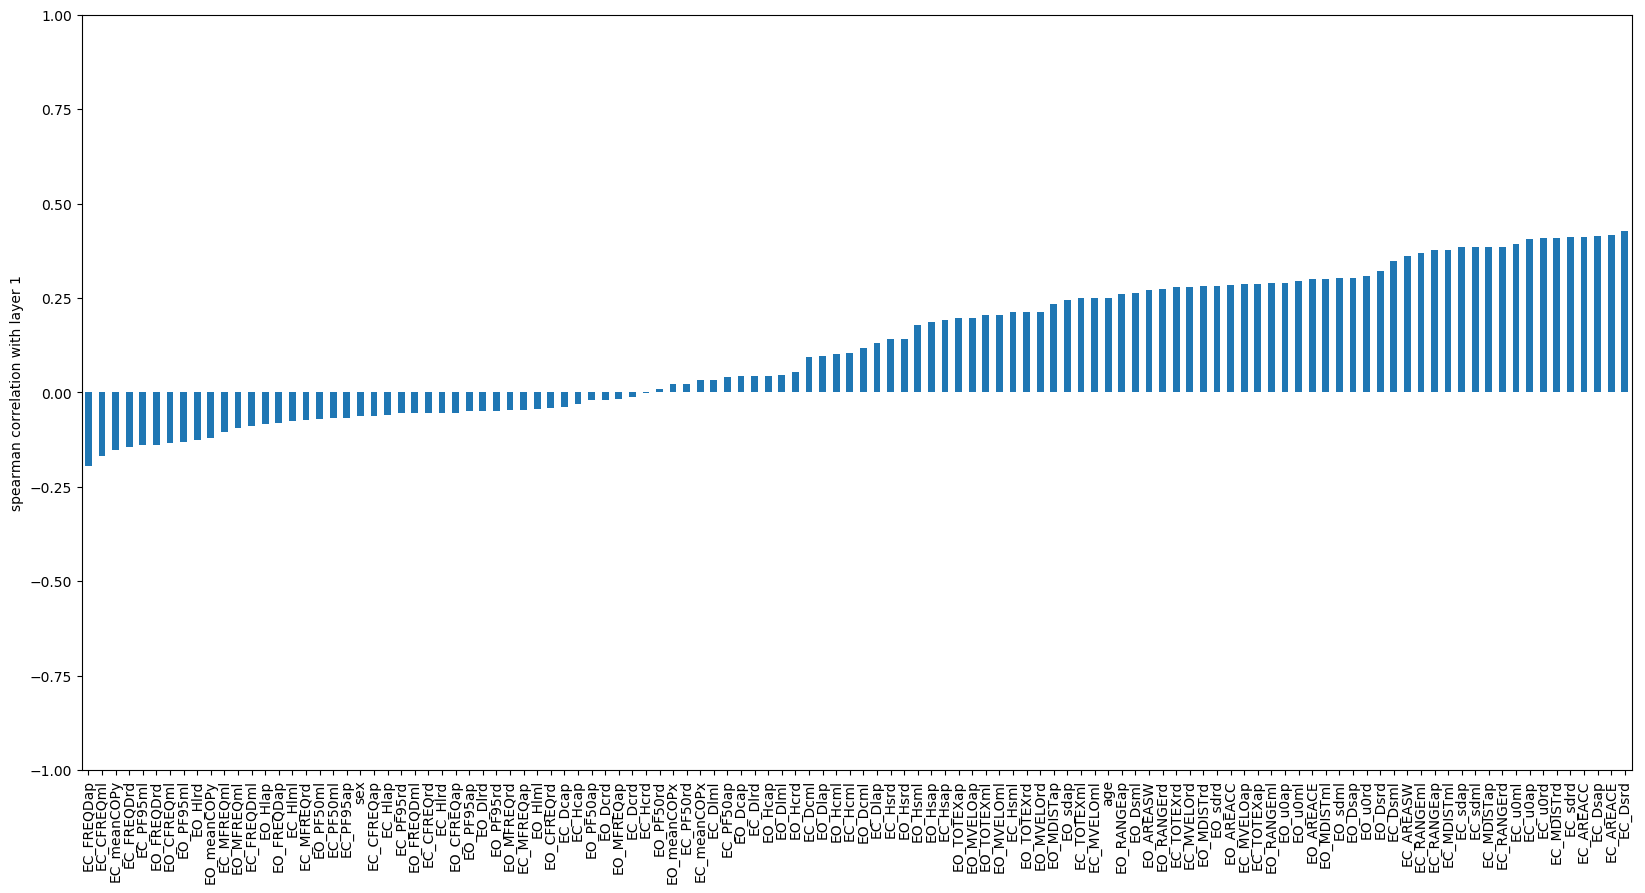

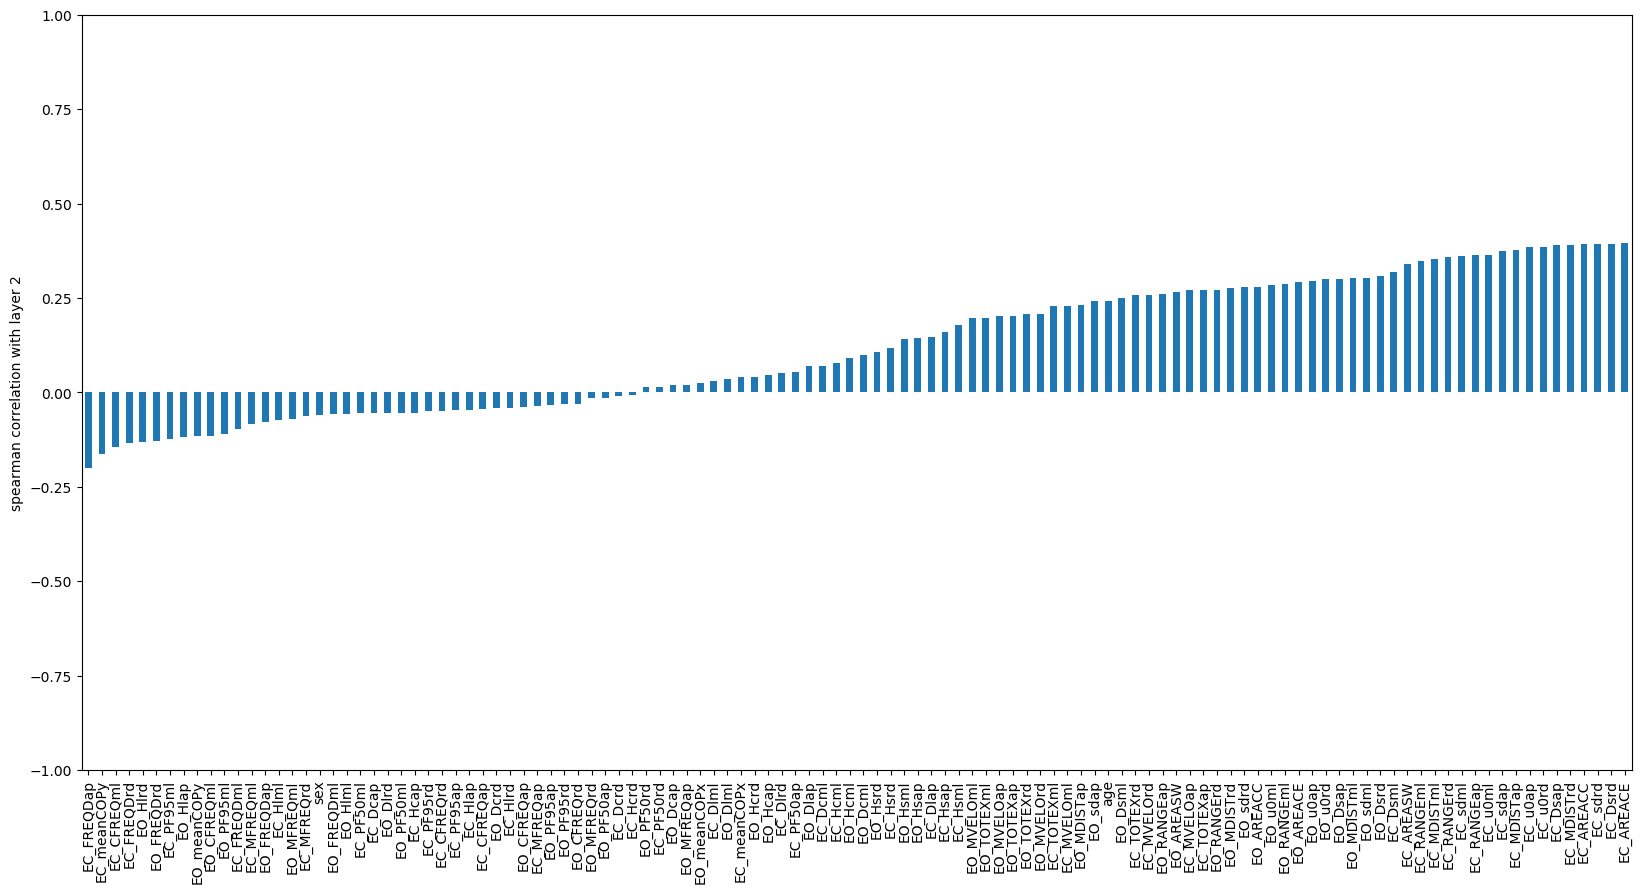

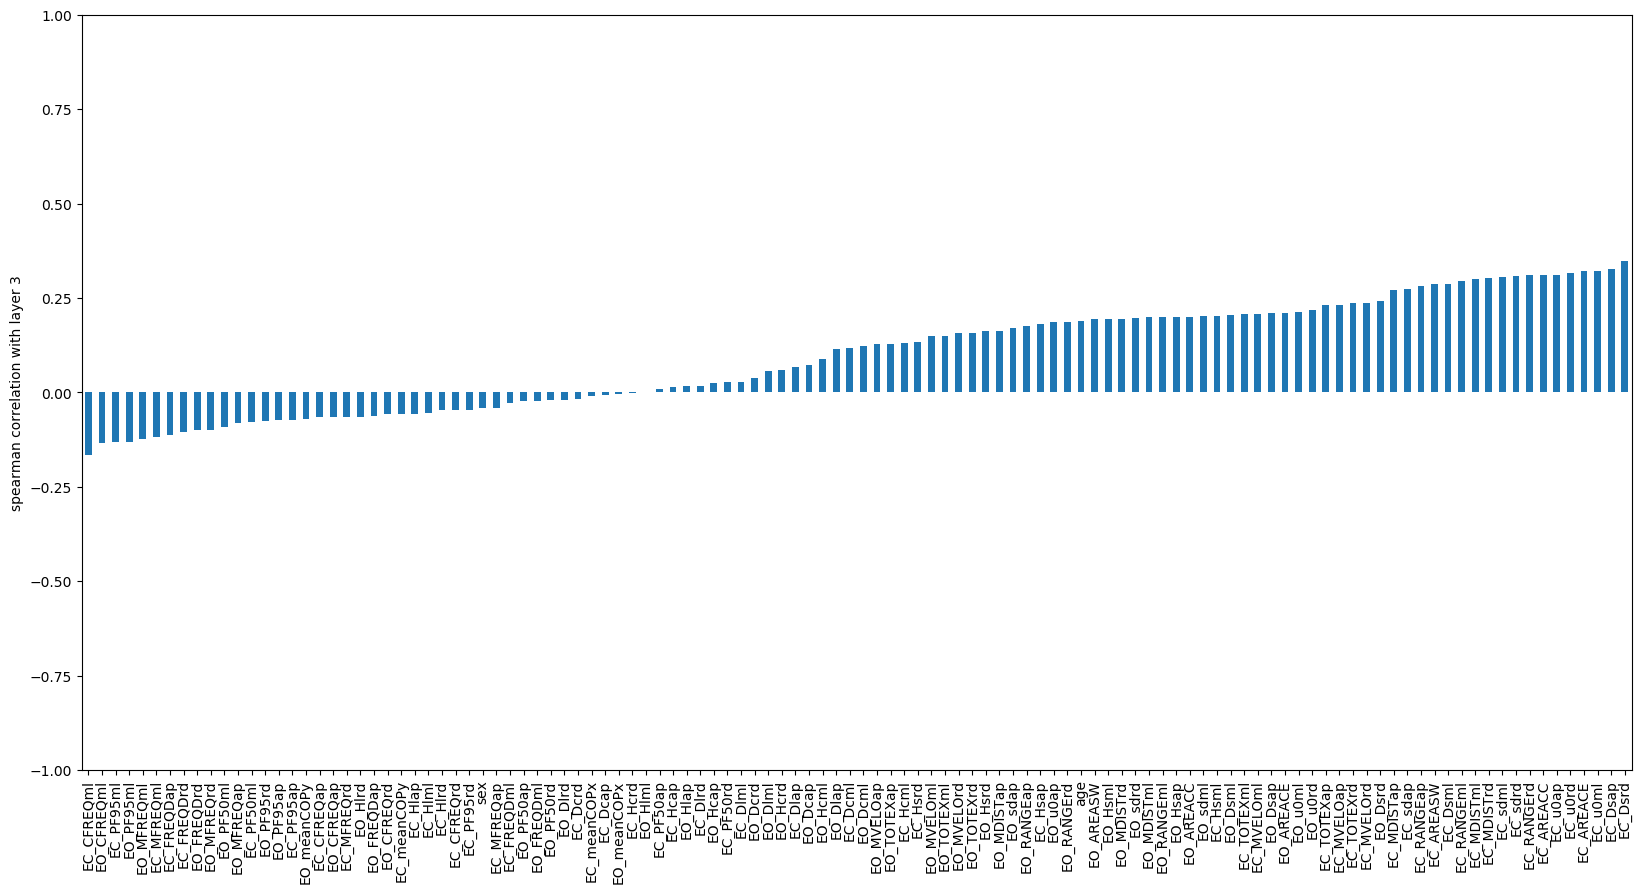

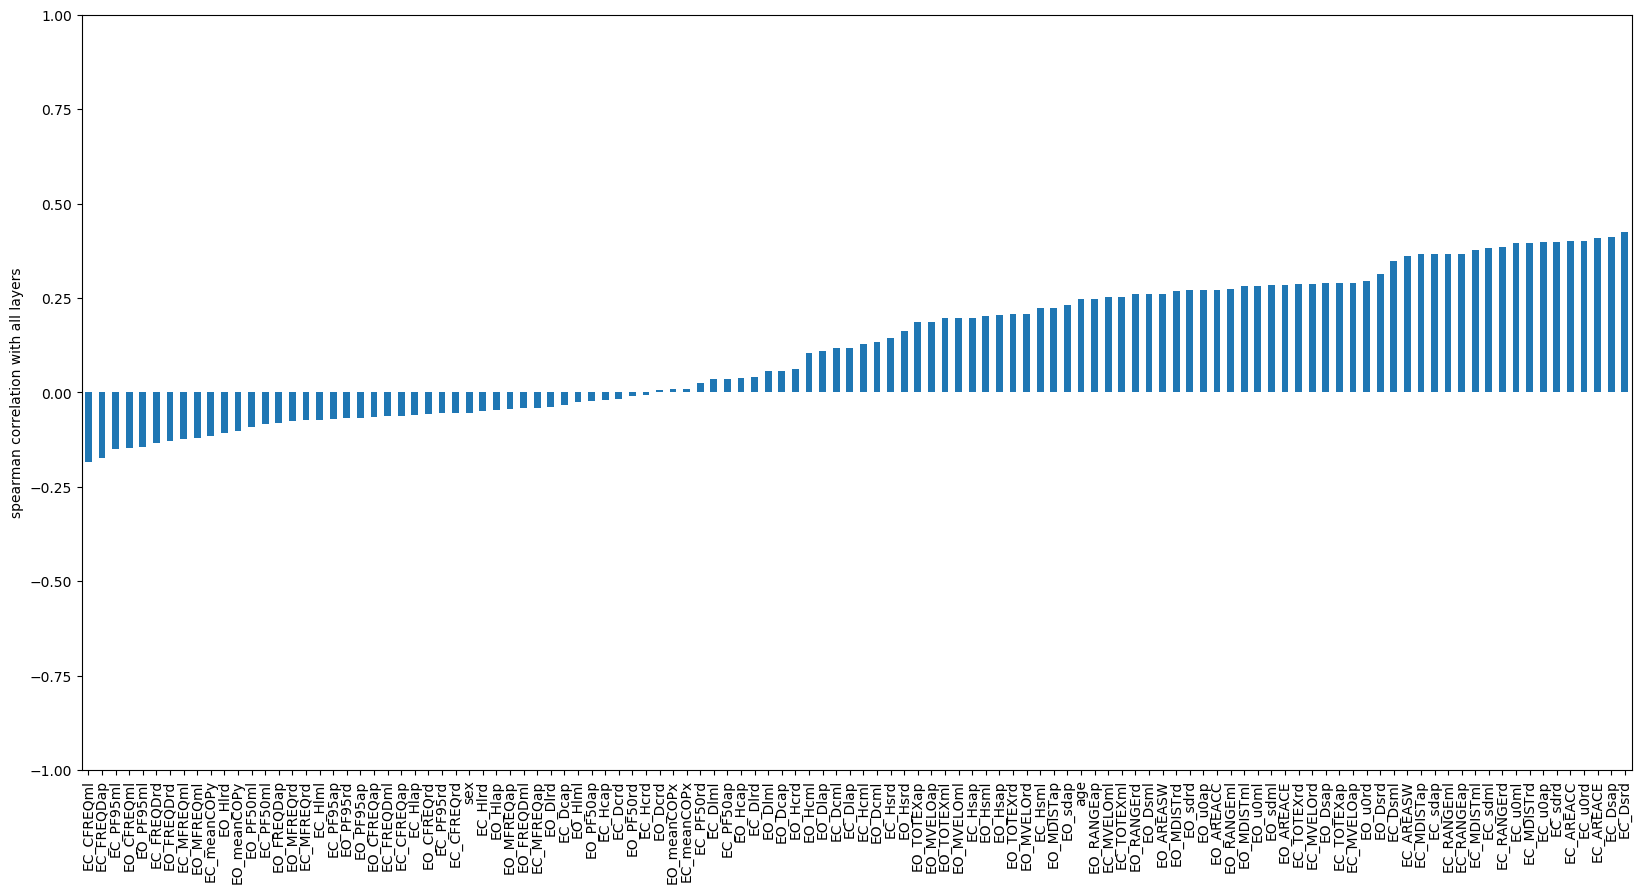

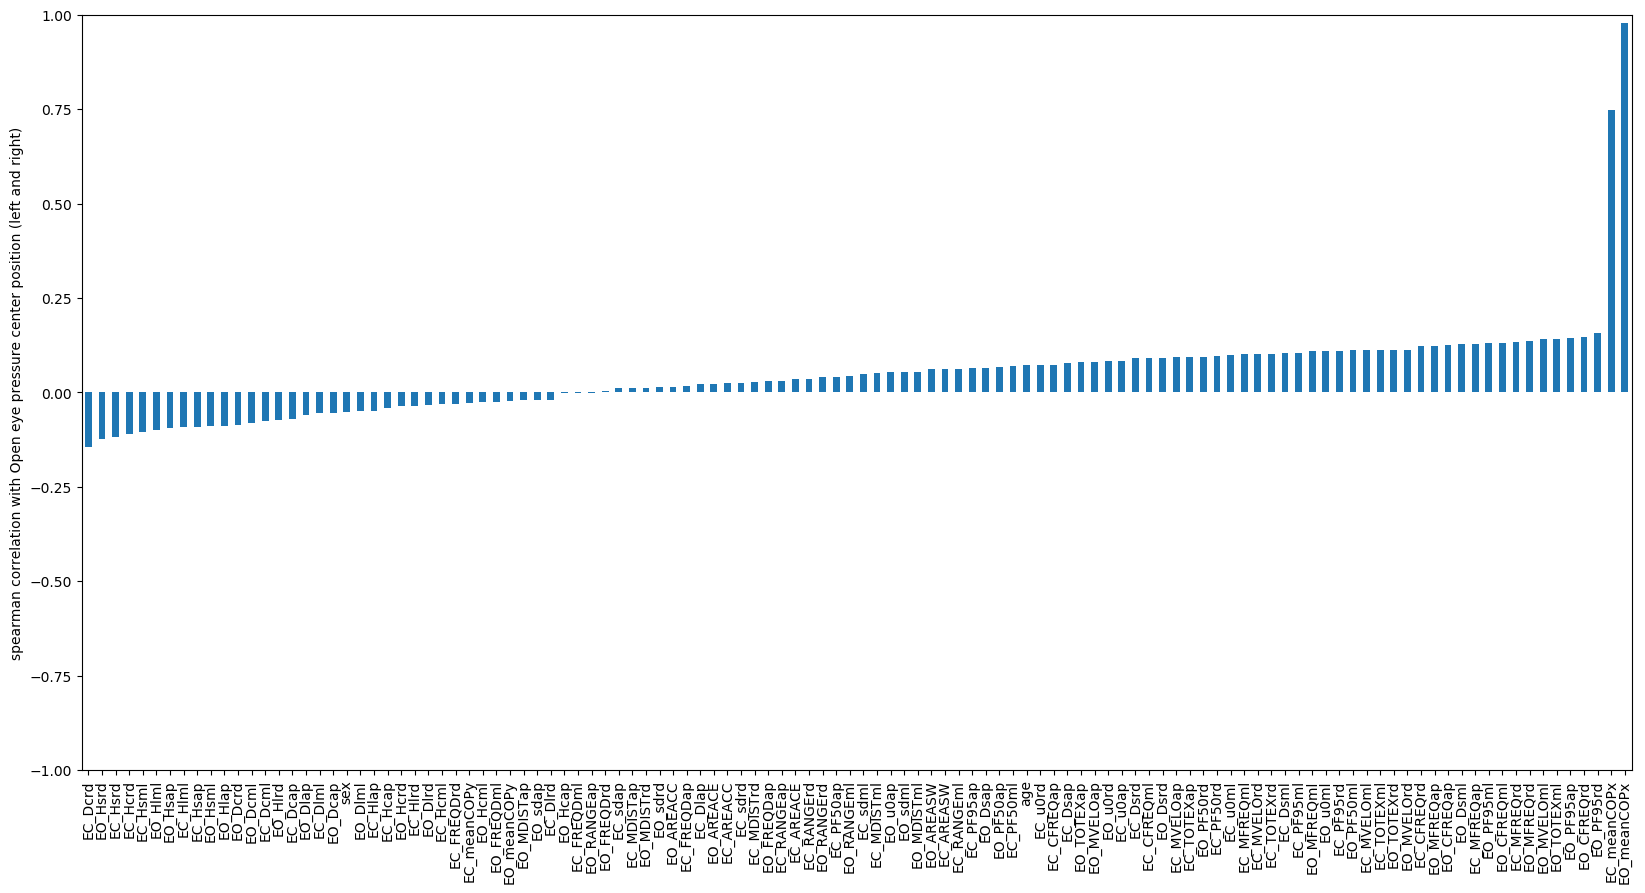

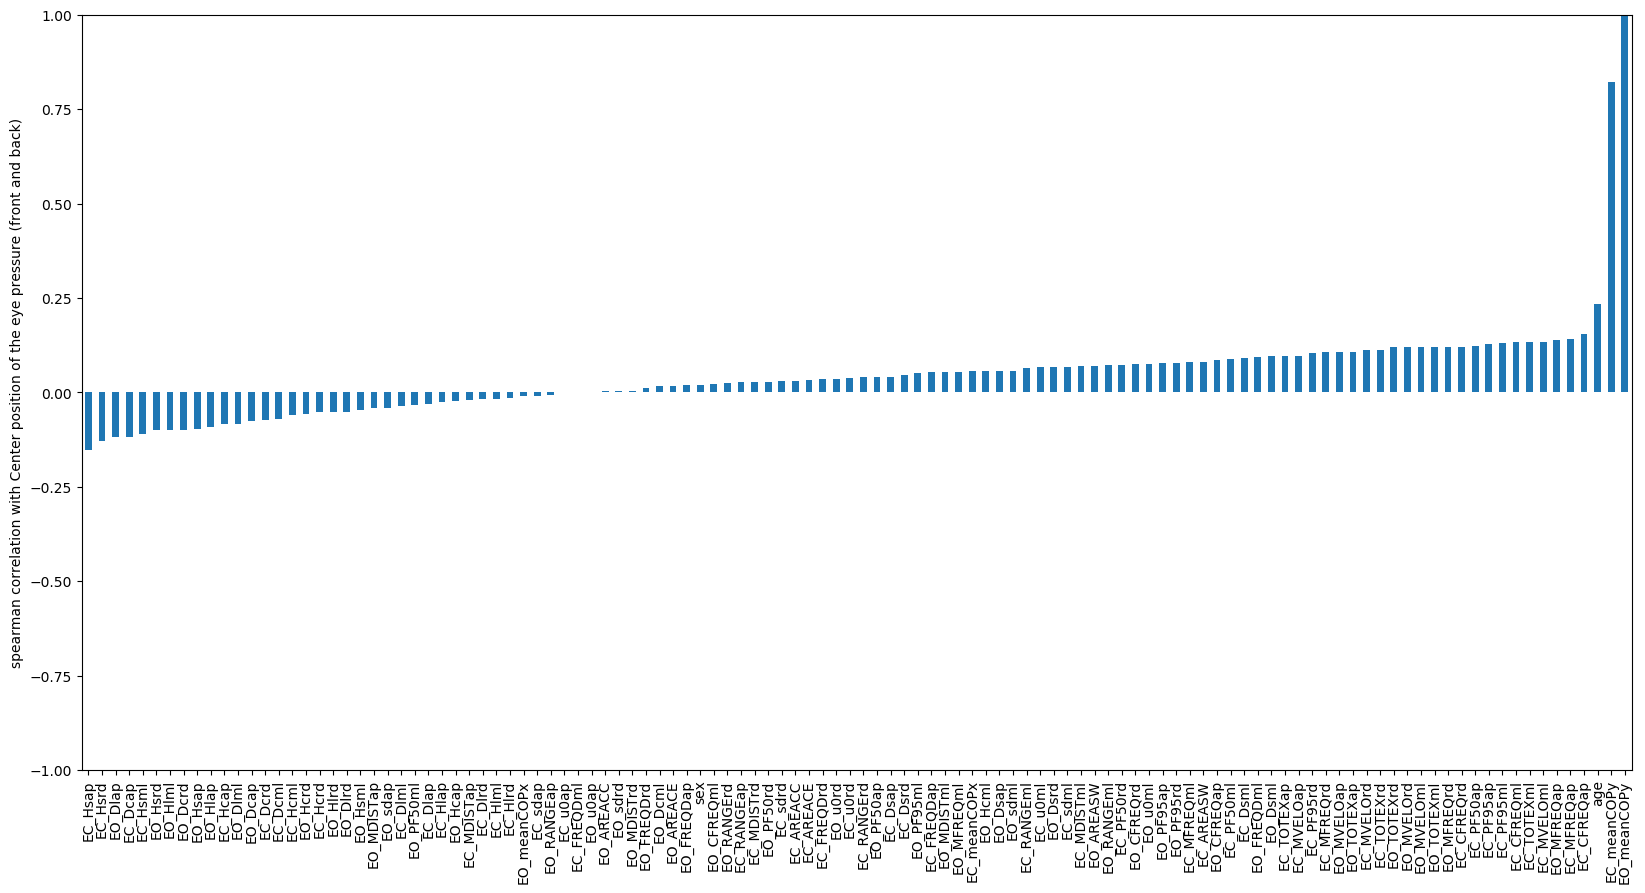

In [5]:
for i in range(6):
    diagnosis=data.iloc[:,3+i]
    spearman_correlations=data[features].corrwith(diagnosis,method='spearman')
    spearman_correlations.sort_values(inplace=True)

    plt.figure(figsize=(20,10),dpi=100)
    ax = spearman_correlations.plot(kind='bar')
    ax.set(ylim=[-1, 1], ylabel='spearman correlation with '+data.columns[3+i]);
    
    
########## Most Correlated Features#############
#spearman_correlations=data[features].corrwith(diagnosis,method='spearman')
#features_layer1=[]
#minimum=0.2 # Change this for different results
#for i in range(len(spearman_correlations)):
#    if abs(spearman_correlations[i])>minimum:
#        features_layer1.append(spearman_correlations.index[i])
#features=features_layer1[:]


# Learning

In [3]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# (!!! LAYER 1 !!!) 

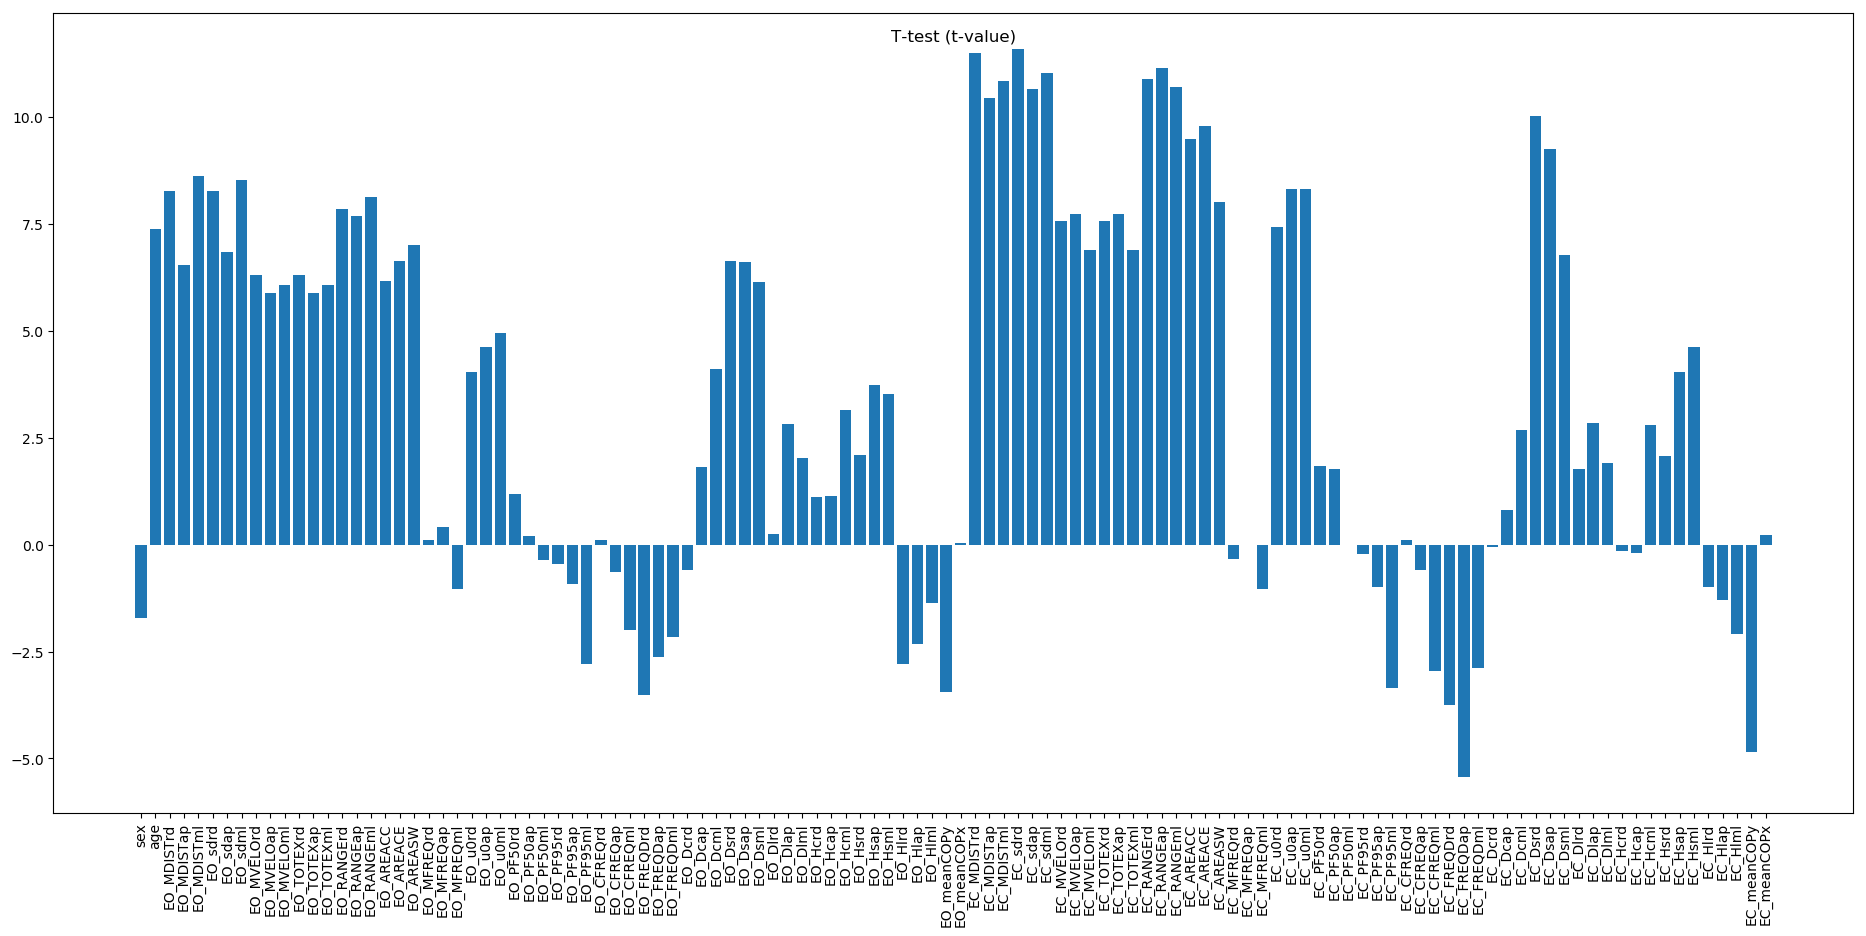

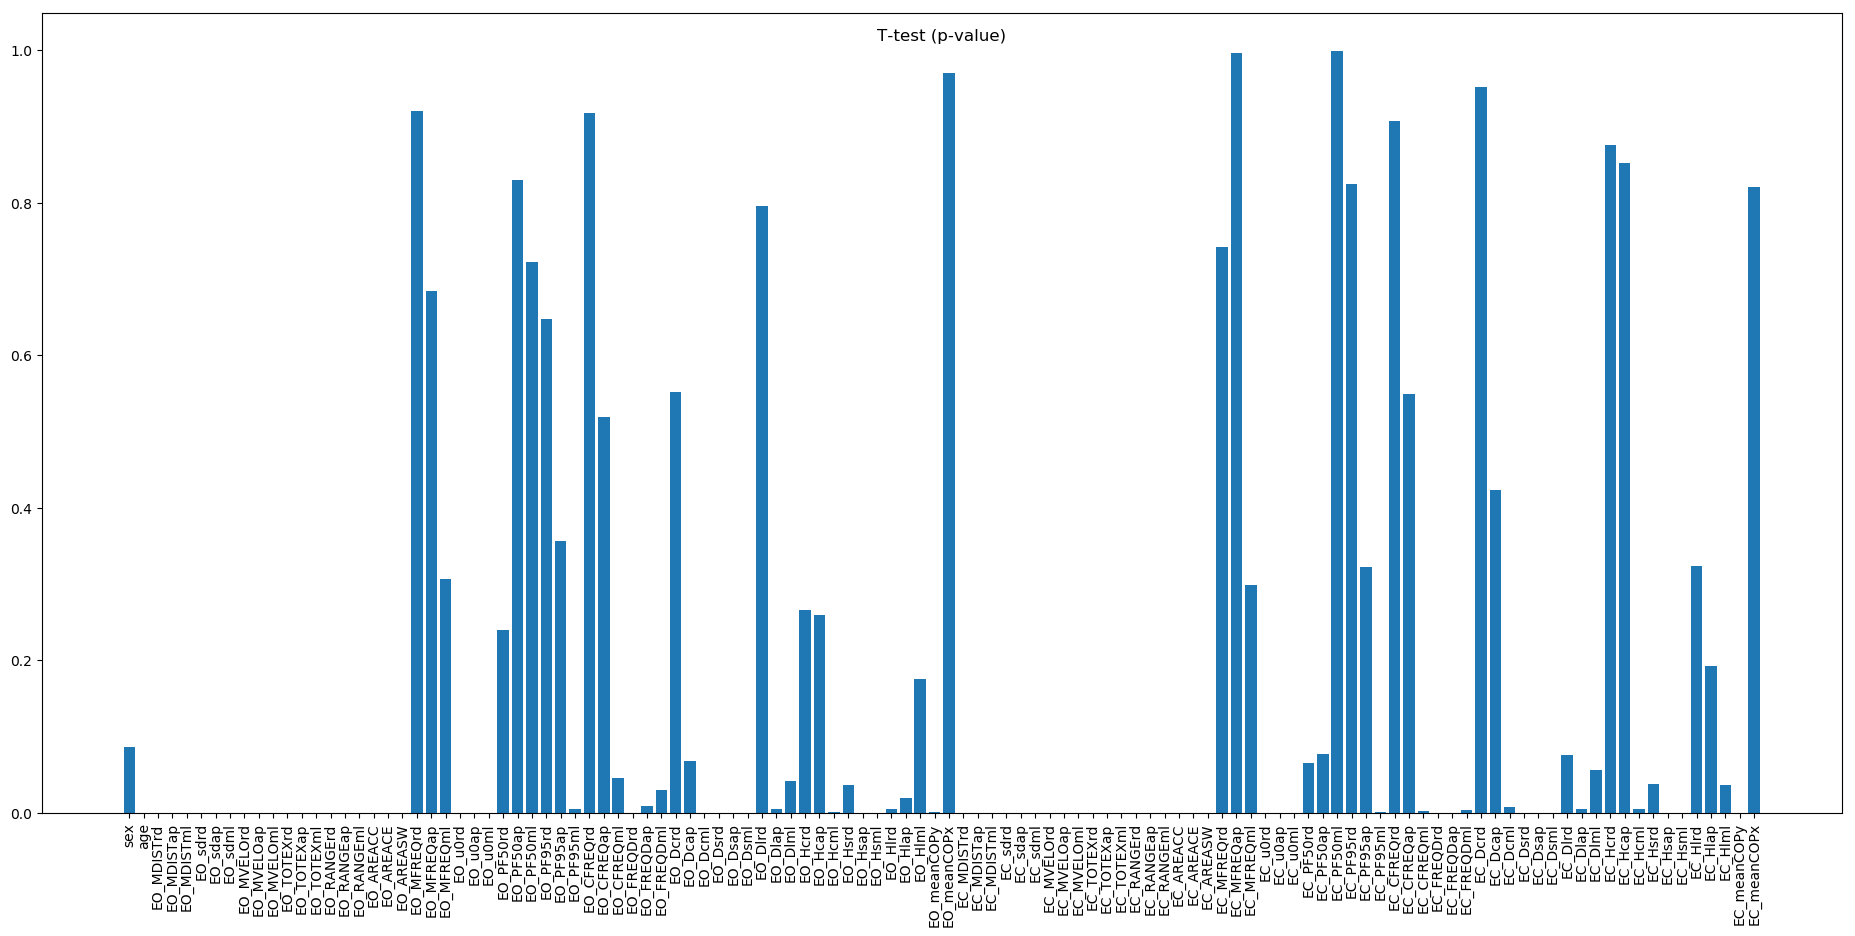

In [4]:
features=all_features[:]
diagnosis=data['layer 1']

###### T-Test (Comparing populations within features [layer 1]) #########
from scipy import stats

t_test=[]
t_test_significant_features=[]
for i in range(len(features)):
    temp=(stats.ttest_ind(data[features[i]].iloc[0:371],data[features[i]].iloc[371:]))[:]
    t_test.append(temp)
    if(temp[1]<=0.05):
        t_test_significant_features.append(features[i])

t_test=pd.DataFrame(t_test, columns =['t-value','p-value'])

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (t-value)')
ax.bar(features,t_test['t-value'])
plt.xticks(rotation=90)

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (p-value)')
ax.bar(features,t_test['p-value'])
plt.xticks(rotation=90)
plt.show

####### Features with p-values<0.05 ###########
features=t_test_significant_features
t_test_significant_features1=t_test_significant_features

In [8]:
# SVC: Train=Test
LSVC=LinearSVC()
scaler=RobustScaler()
scaler.fit(data[features])
scaled=scaler.transform(data[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=277 / FP=67 / TN=297 / FN=94 
Accuracy = 0.780952  
Sensitivity = 0.746631 
Specificity = 0.815934 
Precision = 0.805233


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
# Alternative SVC: Train=Test
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaler.fit(data[features])
scaled=scaler.transform(data[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train=Test Results:
TP=270 / FP=42 / TN=322 / FN=101 
Accuracy = 0.805442  
Sensitivity = 0.727763 
Specificity = 0.884615 
Precision = 0.865385


In [10]:
# K-nearest Neighbors: Train=Test
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaler.fit(data[features])
scaled=scaler.transform(data[features])

neigh.fit(scaled,diagnosis)
diagnosis_predictions=neigh.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=303 / FP=51 / TN=313 / FN=68 
Accuracy = 0.838095  
Sensitivity = 0.816712 
Specificity = 0.859890 
Precision = 0.855932


In [11]:
# Random Forest: Train=Test
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
RF.fit(data[features],diagnosis)
diagnosis_predictions=RF.predict(data[features])

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train=Test Results:
TP=361 / FP=2 / TN=362 / FN=10 
Accuracy = 0.983673  
Sensitivity = 0.973046 
Specificity = 0.994505 
Precision = 0.994490


In [12]:
# SVC: Train-Test Split 
LSVC=LinearSVC()
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=80 / FP=23 / TN=76 / FN=42 
Accuracy = 0.705882  
Sensitivity = 0.655738 
Specificity = 0.767677 
Precision = 0.776699


In [13]:
# Alternative SVC: Train-Test Split
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=82 / FP=14 / TN=85 / FN=40 
Accuracy = 0.755656  
Sensitivity = 0.672131 
Specificity = 0.858586 
Precision = 0.854167


In [14]:
# K-nearest Neighbors: Train-Test Split
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

neigh.fit(scaled_train,diagnosis_train)
diagnosis_predictions=neigh.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=87 / FP=23 / TN=76 / FN=35 
Accuracy = 0.737557  
Sensitivity = 0.713115 
Specificity = 0.767677 
Precision = 0.790909


In [15]:
# Random Forest: Train-Test Split
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data[features], diagnosis,test_size=0.3, random_state=42)
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
#RF.set_params(n_estimators=100) # Tree number
RF.fit(scaled_train,diagnosis_train)
diagnosis_predictions=RF.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)): 
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=83 / FP=23 / TN=76 / FN=39 
Accuracy = 0.719457  
Sensitivity = 0.680328 
Specificity = 0.767677 
Precision = 0.783019


In [16]:
# SVC: Leave-One Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=259 / FP=83 / TN=281 / FN=112 
Accuracy = 0.734694  
Sensitivity = 0.698113 
Specificity = 0.771978 
Precision = 0.757310


In [17]:
# Alternative SVC: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=250 / FP=73 / TN=291 / FN=121 
Accuracy = 0.736054  
Sensitivity = 0.673854 
Specificity = 0.799451 
Precision = 0.773994


In [18]:
# K-nearest Neighbors: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=neigh.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=245 / FP=104 / TN=260 / FN=126 
Accuracy = 0.687075  
Sensitivity = 0.660377 
Specificity = 0.714286 
Precision = 0.702006


In [19]:
# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=224 / FP=75 / TN=289 / FN=147 
Accuracy = 0.697959  
Sensitivity = 0.603774 
Specificity = 0.793956 
Precision = 0.749164


# (!!! LAYER 2 !!!) 

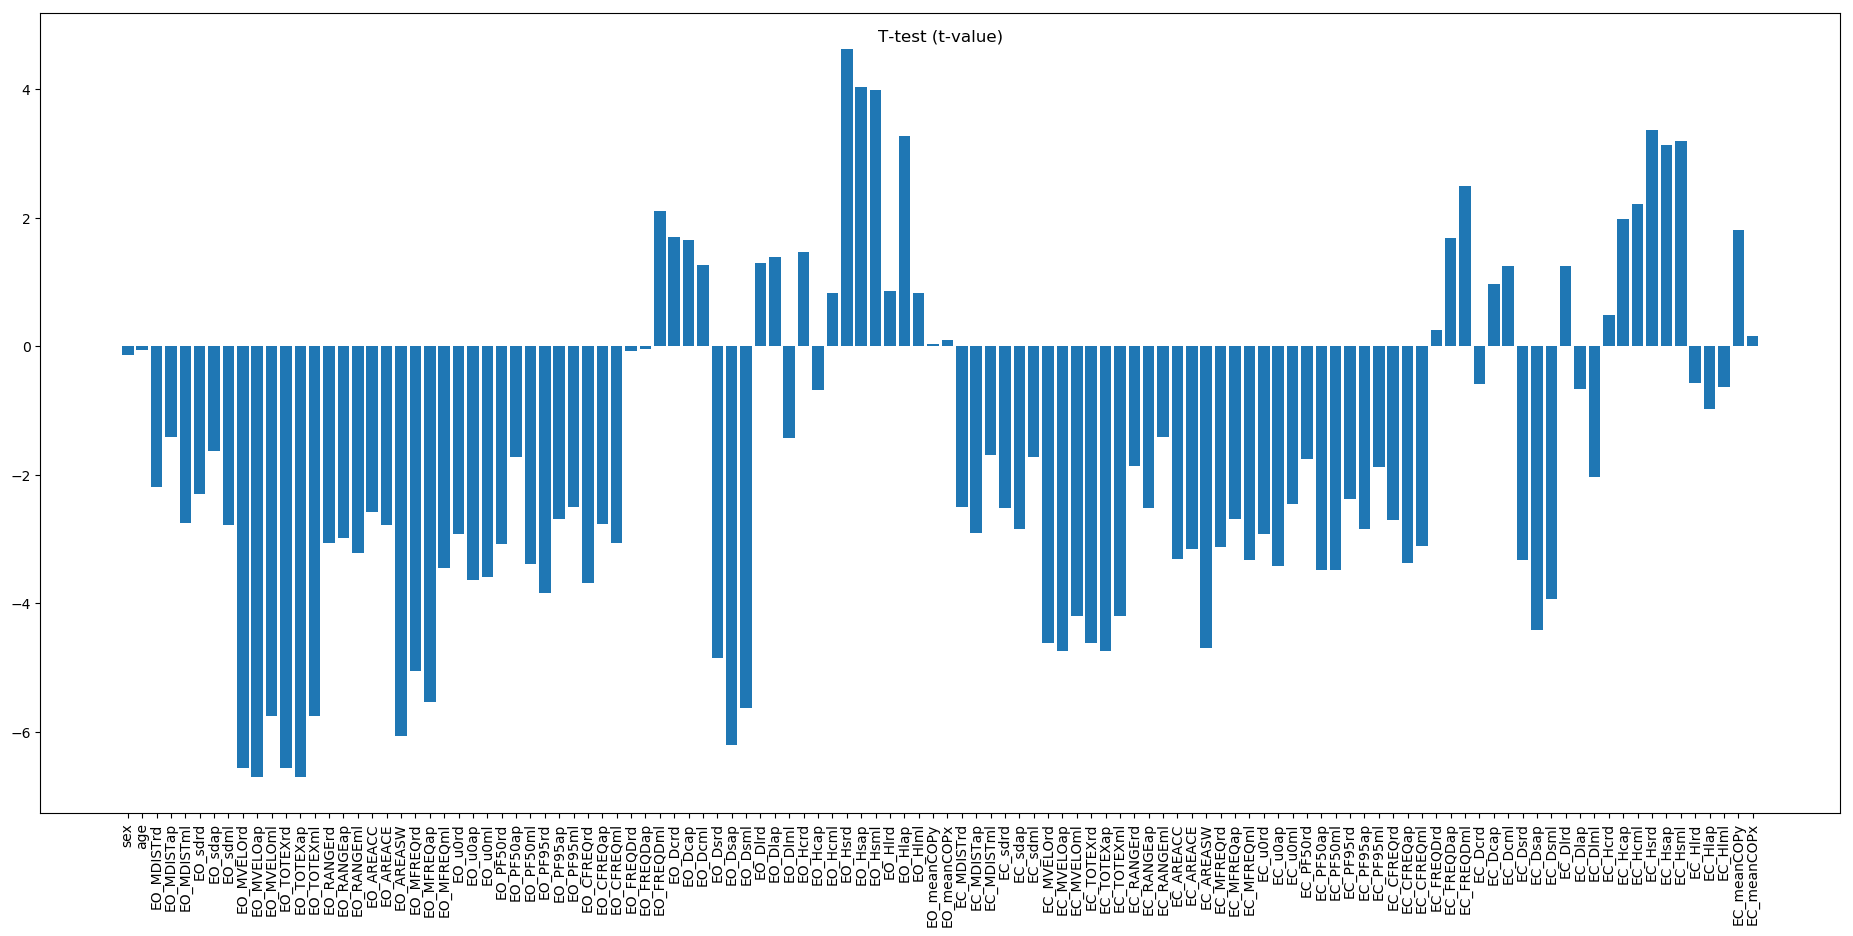

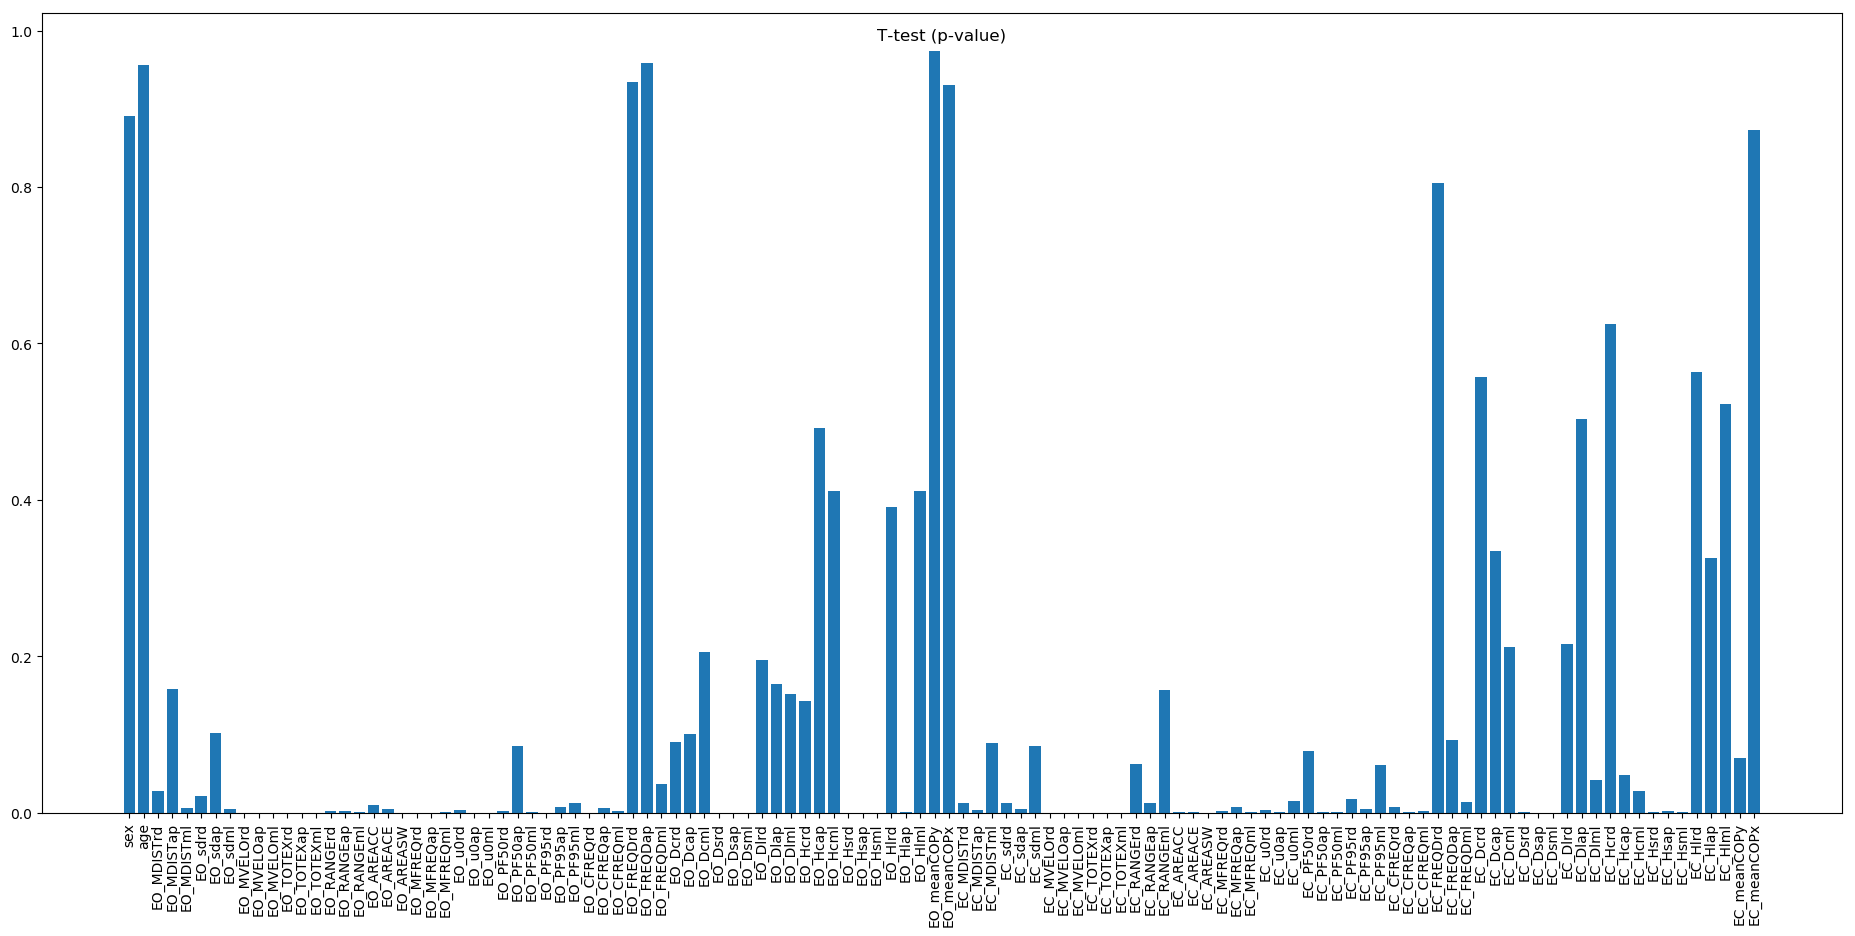

In [5]:
features=all_features[:]
data_layer2=data[data['layer 2'] !=-1]
diagnosis=data_layer2['layer 2']

# T-Test (Comparing populations within features [layer 2])
from scipy import stats

t_test=[]
t_test_significant_features=[]
data_layer2_0=data_layer2[data_layer2['layer 2'].isin([0])]
data_layer2_1=data_layer2[data_layer2['layer 2'].isin([1])]
for i in range(len(features)):
    temp=(stats.ttest_ind(data_layer2_0[features[i]],data_layer2_1[features[i]]))[:]
    t_test.append(temp)
    if(temp[1]<=0.05):
        t_test_significant_features.append(features[i])

t_test=pd.DataFrame(t_test, columns =['t-value','p-value'])

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (t-value)')
ax.bar(features,t_test['t-value'])
plt.xticks(rotation=90)

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (p-value)')
ax.bar(features,t_test['p-value'])
plt.xticks(rotation=90)

######## Features with p-values<0.05 ########
features=t_test_significant_features
t_test_significant_features2=t_test_significant_features

In [21]:
# SVC: Train=Test
LSVC=LinearSVC()
scaler=RobustScaler()
scaler.fit(data_layer2[features])
scaled=scaler.transform(data_layer2[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=55 / FP=16 / TN=243 / FN=57 
Accuracy = 0.803235  
Sensitivity = 0.491071 
Specificity = 0.938224 
Precision = 0.774648


In [22]:
# Alternative SVC: Train=Test
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaler.fit(data_layer2[features])
scaled=scaler.transform(data_layer2[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=36 / FP=0 / TN=259 / FN=76 
Accuracy = 0.795148  
Sensitivity = 0.321429 
Specificity = 1.000000 
Precision = 1.000000


In [23]:
# K-nearest Neighbors: Train=Test
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaler.fit(data_layer2[features])
scaled=scaler.transform(data_layer2[features])

neigh.fit(scaled,diagnosis)
diagnosis_predictions=neigh.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=72 / FP=12 / TN=247 / FN=40 
Accuracy = 0.859838  
Sensitivity = 0.642857 
Specificity = 0.953668 
Precision = 0.857143


In [24]:
# Random Forest: Train=Test
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
RF.fit(data_layer2[features],diagnosis)
diagnosis_predictions=RF.predict(data_layer2[features])

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=104 / FP=0 / TN=259 / FN=8 
Accuracy = 0.978437  
Sensitivity = 0.928571 
Specificity = 1.000000 
Precision = 1.000000


In [25]:
# SVC: Train-Test Split 
LSVC=LinearSVC()
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer2[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=10 / FP=11 / TN=64 / FN=27 
Accuracy = 0.660714  
Sensitivity = 0.270270 
Specificity = 0.853333 
Precision = 0.476190


In [26]:
# Alternative SVC: Train-Test Split
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer2[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=6 / FP=2 / TN=73 / FN=31 
Accuracy = 0.705357  
Sensitivity = 0.162162 
Specificity = 0.973333 
Precision = 0.750000


In [27]:
# K-nearest Neighbors: Train-Test Split
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer2[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

neigh.fit(scaled_train,diagnosis_train)
diagnosis_predictions=neigh.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=15 / FP=15 / TN=60 / FN=22 
Accuracy = 0.669643  
Sensitivity = 0.405405 
Specificity = 0.800000 
Precision = 0.500000


In [28]:
# Random Forest: Train-Test Split
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer2[features], diagnosis,test_size=0.3, random_state=42)
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
#RF.set_params(n_estimators=100) # Tree number
RF.fit(scaled_train,diagnosis_train)
diagnosis_predictions=RF.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)): 
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=12 / FP=10 / TN=65 / FN=25 
Accuracy = 0.687500  
Sensitivity = 0.324324 
Specificity = 0.866667 
Precision = 0.545455


In [29]:
# SVC: Leave-One Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer2[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer2.index)
for train_index, test_index in loo.split(data_layer2[features]):
    scaled_train, scaled_test = data_layer2[features].iloc[list(i for i in train_index),:], data_layer2[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=40 / FP=37 / TN=222 / FN=72 
Accuracy = 0.706199  
Sensitivity = 0.357143 
Specificity = 0.857143 
Precision = 0.519481


In [30]:
# Alternative SVC: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer2[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer2.index)
for train_index, test_index in loo.split(data_layer2[features]):
    scaled_train, scaled_test = data_layer2[features].iloc[list(i for i in train_index),:], data_layer2[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=30 / FP=3 / TN=256 / FN=82 
Accuracy = 0.770889  
Sensitivity = 0.267857 
Specificity = 0.988417 
Precision = 0.909091


In [31]:
# K-nearest Neighbors: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer2[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer2.index)
for train_index, test_index in loo.split(data_layer2[features]):
    scaled_train, scaled_test = data_layer2[features].iloc[list(i for i in train_index),:], data_layer2[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=neigh.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=50 / FP=34 / TN=225 / FN=62 
Accuracy = 0.741240  
Sensitivity = 0.446429 
Specificity = 0.868726 
Precision = 0.595238


In [32]:
# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data_layer2[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer2.index)
for train_index, test_index in loo.split(data_layer2[features]):
    scaled_train, scaled_test = data_layer2[features].iloc[list(i for i in train_index),:], data_layer2[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=45 / FP=20 / TN=239 / FN=67 
Accuracy = 0.765499  
Sensitivity = 0.401786 
Specificity = 0.922780 
Precision = 0.692308


# (!!! LAYER 3 !!!) 

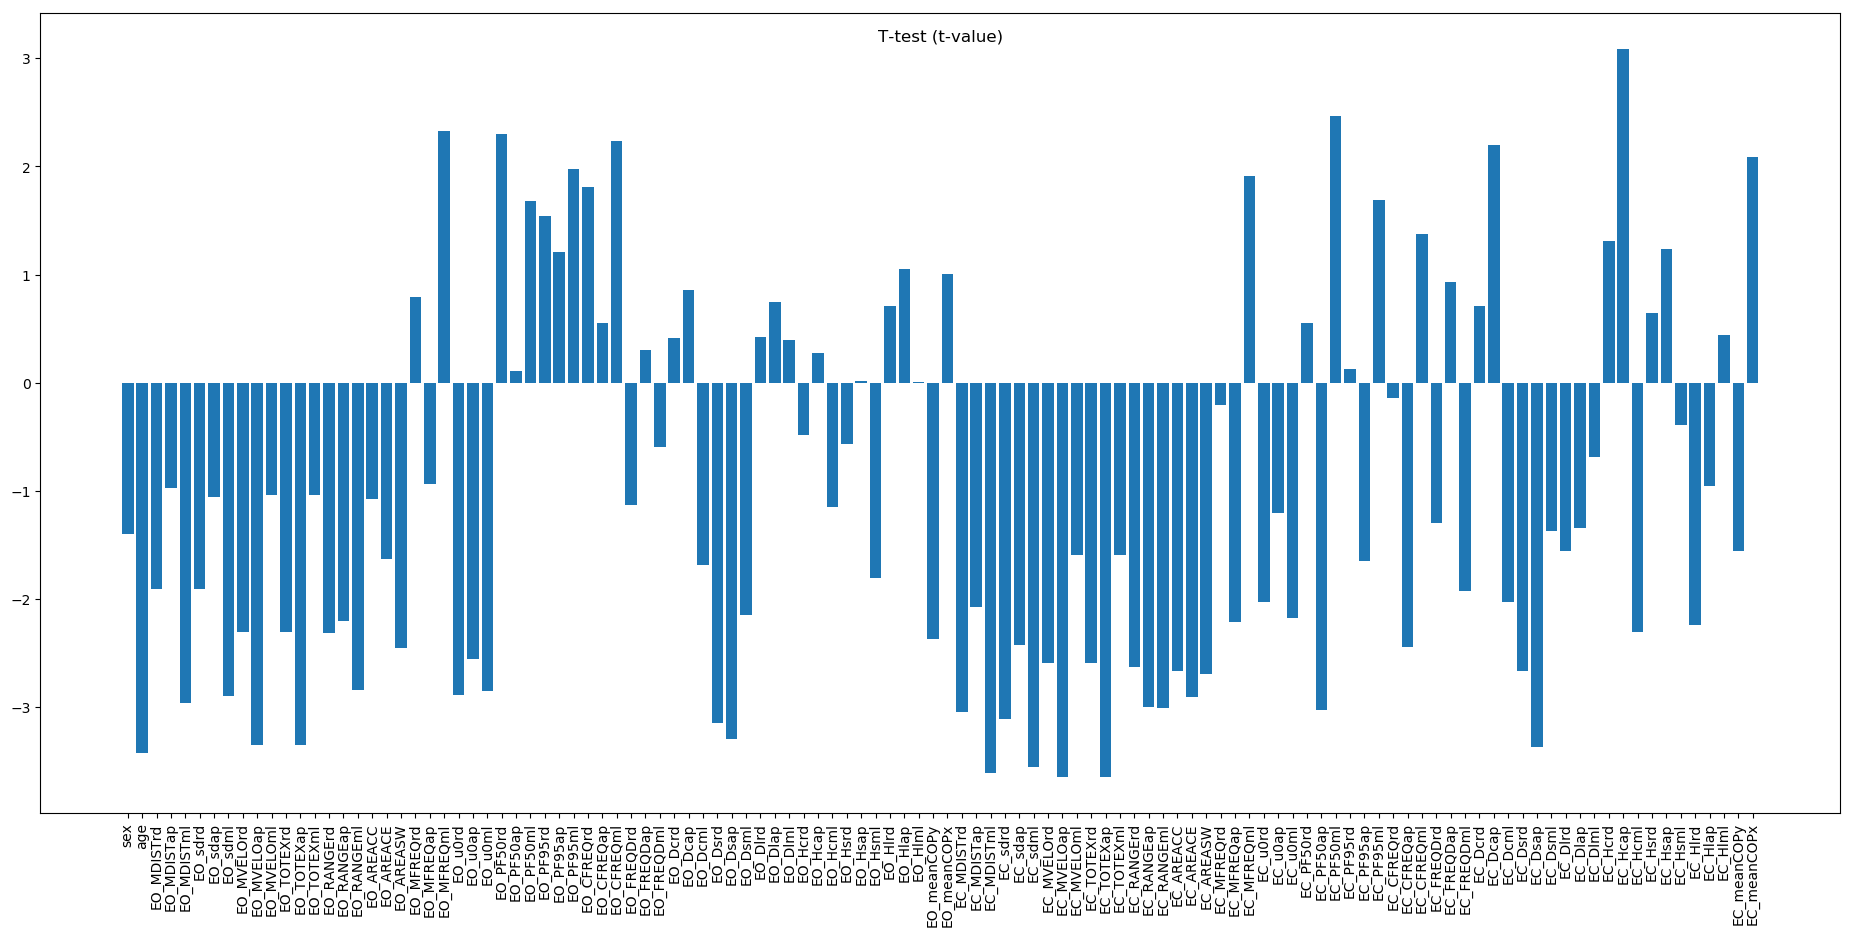

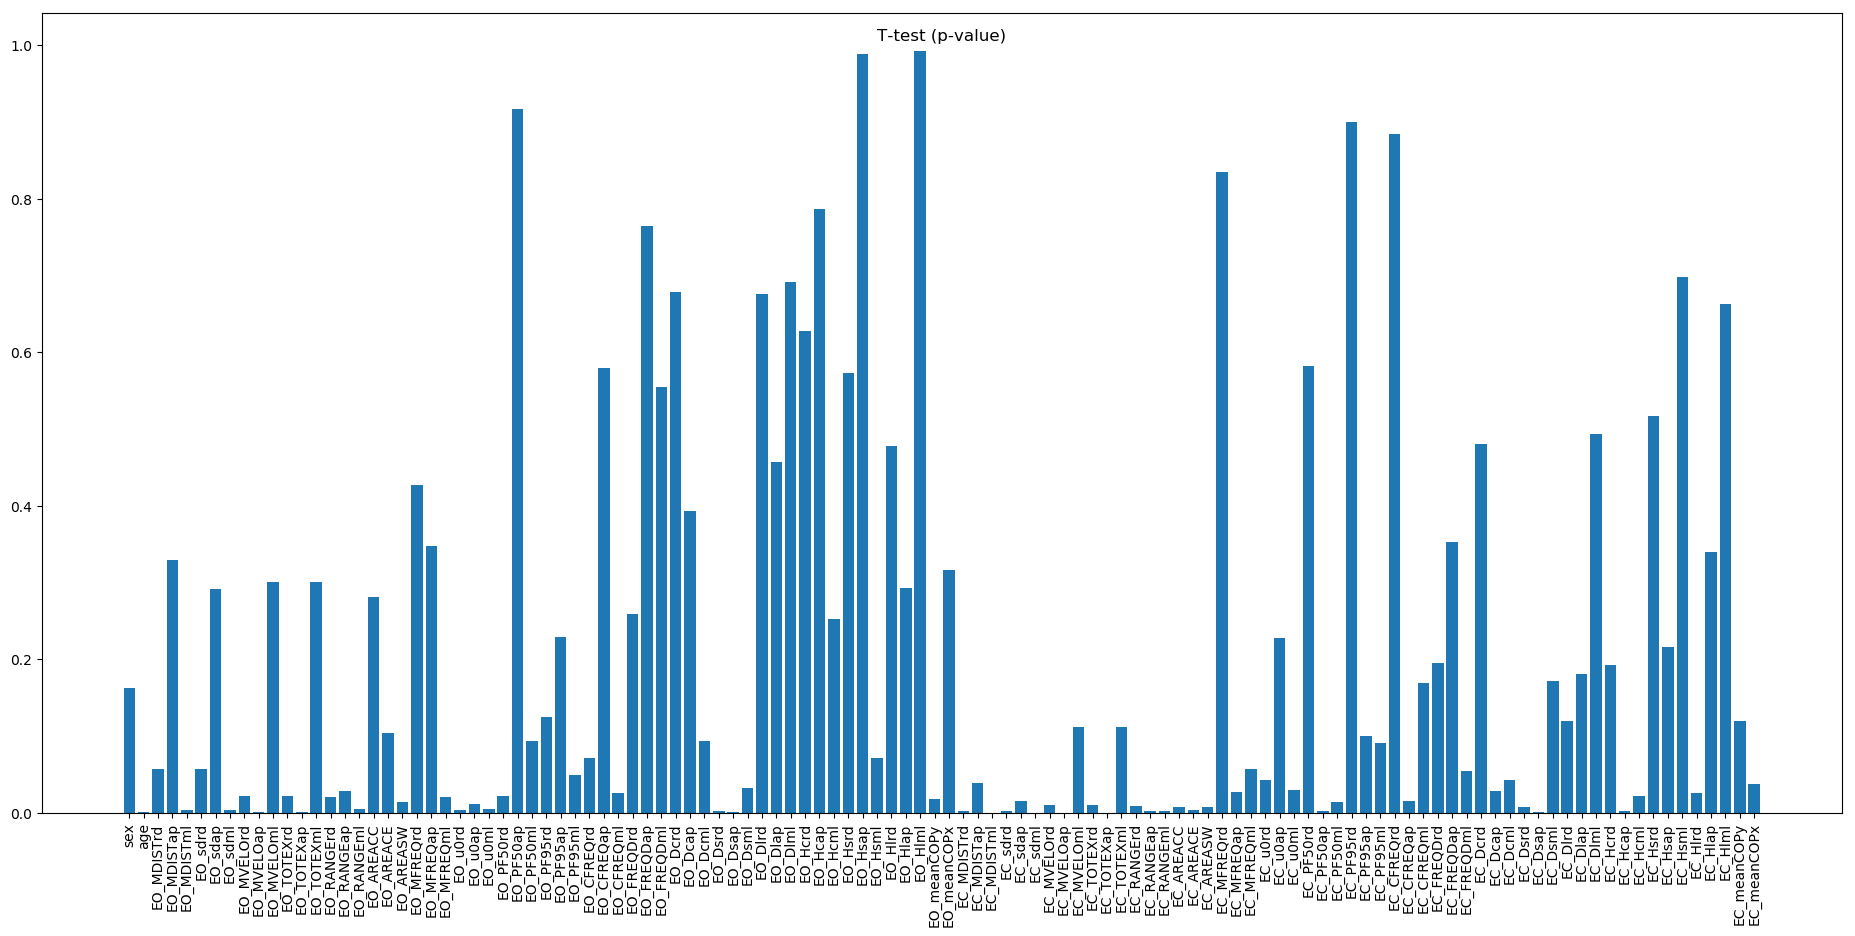

In [6]:
features=all_features[:]
data_layer3=data[data['layer 3'] !=-1]
diagnosis=data_layer3['layer 3']

# T-Test (Comparing populations within features [layer 3])
from scipy import stats

t_test=[]
t_test_significant_features=[]
data_layer3_0=data_layer3[data_layer3['layer 3'].isin([0])]
data_layer3_1=data_layer3[data_layer3['layer 3'].isin([1])]
for i in range(len(features)):
    temp=(stats.ttest_ind(data_layer3_0[features[i]],data_layer3_1[features[i]]))[:]
    t_test.append(temp)
    if(temp[1]<=0.05):
        t_test_significant_features.append(features[i])

t_test=pd.DataFrame(t_test, columns =['t-value','p-value'])

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (t-value)')
ax.bar(features,t_test['t-value'])
plt.xticks(rotation=90)

fig=plt.figure(figsize=(18,8),dpi=100)
ax = fig.add_axes([0,0,1,1])
fig.suptitle('T-test (p-value)')
ax.bar(features,t_test['p-value'])
plt.xticks(rotation=90)

# Features with p-values<0.05
features=t_test_significant_features
t_test_significant_features3=t_test_significant_features

In [34]:
# SVC: Train=Test
LSVC=LinearSVC()
scaler=RobustScaler()
scaler.fit(data_layer3[features])
scaled=scaler.transform(data_layer3[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=16 / FP=2 / TN=221 / FN=20 
Accuracy = 0.915058  
Sensitivity = 0.444444 
Specificity = 0.991031 
Precision = 0.888889


In [35]:
# Alternative SVC: Train=Test
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaler.fit(data_layer3[features])
scaled=scaler.transform(data_layer3[features])

LSVC=LSVC.fit(scaled,diagnosis)
diagnosis_predictions=LSVC.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)):   
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=8 / FP=0 / TN=223 / FN=28 
Accuracy = 0.891892  
Sensitivity = 0.222222 
Specificity = 1.000000 
Precision = 1.000000


In [36]:
# K-nearest Neighbors: Train=Test
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaler.fit(data_layer3[features])
scaled=scaler.transform(data_layer3[features])

neigh.fit(scaled,diagnosis)
diagnosis_predictions=neigh.predict(scaled)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=16 / FP=3 / TN=220 / FN=20 
Accuracy = 0.911197  
Sensitivity = 0.444444 
Specificity = 0.986547 
Precision = 0.842105


In [37]:
# Random Forest: Train=Test
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
RF.fit(data_layer3[features],diagnosis)
diagnosis_predictions=RF.predict(data_layer3[features])

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis)): 
    if diagnosis[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train=Test Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train=Test Results:
TP=30 / FP=0 / TN=223 / FN=6 
Accuracy = 0.976834  
Sensitivity = 0.833333 
Specificity = 1.000000 
Precision = 1.000000


In [38]:
# SVC: Train-Test Split 
LSVC=LinearSVC()
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer3[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=2 / FP=5 / TN=60 / FN=11 
Accuracy = 0.794872  
Sensitivity = 0.153846 
Specificity = 0.923077 
Precision = 0.285714


In [39]:
# Alternative SVC: Train-Test Split
LSVC=SVC(kernel='rbf')
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer3[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

LSVC=LSVC.fit(scaled_train,diagnosis_train)
diagnosis_predictions=LSVC.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
if((TP+FN)!=0):
    Sensitivity=TP/(TP+FN)
else:
    Sensitivity=0
if((TN+FP)!=0):
    Specificity=TN/(TN+FP)
else:
    Specificity=0
if((TP+FP)!=0):
    Precision=TP/(TP+FP)
else:
    Precision=0
if((Precision+Sensitivity)!=0):
    F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
else:
    F1_Score=0
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=0 / FP=0 / TN=65 / FN=13 
Accuracy = 0.833333  
Sensitivity = 0.000000 
Specificity = 1.000000 
Precision = 0.000000


In [40]:
# K-nearest Neighbors: Train-Test Split
neigh = KNeighborsClassifier(n_neighbors=3)
scaler=RobustScaler()
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer3[features], diagnosis,test_size=0.3, random_state=42)
scaler.fit(scaled_train)
scaled_train=scaler.transform(scaled_train)
scaled_test=scaler.transform(scaled_test)

neigh.fit(scaled_train,diagnosis_train)
diagnosis_predictions=neigh.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)):   
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
if((TP+FN)!=0):
    Sensitivity=TP/(TP+FN)
else:
    Sensitivity=0
if((TN+FP)!=0):
    Specificity=TN/(TN+FP)
else:
    Specificity=0
if((TP+FP)!=0):
    Precision=TP/(TP+FP)
else:
    Precision=0
if((Precision+Sensitivity)!=0):
    F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
else:
    F1_Score=0
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=0 / FP=1 / TN=64 / FN=13 
Accuracy = 0.820513  
Sensitivity = 0.000000 
Specificity = 0.984615 
Precision = 0.000000


In [41]:
# Random Forest: Train-Test Split
scaled_train, scaled_test, diagnosis_train, diagnosis_test = train_test_split(data_layer3[features], diagnosis,test_size=0.3, random_state=42)
RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
#RF.set_params(n_estimators=100) # Tree number
RF.fit(scaled_train,diagnosis_train)
diagnosis_predictions=RF.predict(scaled_test)

TP, FP, TN, FN = 0, 0, 0, 0
for i in range(len(diagnosis_test)): 
    if diagnosis_test[i]==diagnosis_predictions[i]==1:
        TP=TP+1
    elif diagnosis_test[i]==diagnosis_predictions[i]==0:
        TN=TN+1
    elif diagnosis_test[i]==1 and diagnosis_predictions[i]==0:
        FN=FN+1
    elif diagnosis_test[i]==0 and diagnosis_predictions[i]==1:
        FP=FP+1
Accuracy=(TP+TN)/(len(diagnosis_test))
if((TP+FN)!=0):
    Sensitivity=TP/(TP+FN)
else:
    Sensitivity=0
if((TN+FP)!=0):
    Specificity=TN/(TN+FP)
else:
    Specificity=0
if((TP+FP)!=0):
    Precision=TP/(TP+FP)
else:
    Precision=0
if((Precision+Sensitivity)!=0):
    F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
else:
    F1_Score=0
print("Train-Test Split Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Train-Test Split Results:
TP=2 / FP=1 / TN=64 / FN=11 
Accuracy = 0.846154  
Sensitivity = 0.153846 
Specificity = 0.984615 
Precision = 0.666667


In [42]:
# SVC: Leave-One Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer3[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer3.index)
for train_index, test_index in loo.split(data_layer3[features]):
    scaled_train, scaled_test = data_layer3[features].iloc[list(i for i in train_index),:], data_layer3[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=11 / FP=15 / TN=208 / FN=25 
Accuracy = 0.845560  
Sensitivity = 0.305556 
Specificity = 0.932735 
Precision = 0.423077


In [43]:
# Alternative SVC: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer3[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer3.index)
for train_index, test_index in loo.split(data_layer3[features]):
    scaled_train, scaled_test = data_layer3[features].iloc[list(i for i in train_index),:], data_layer3[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=7 / FP=0 / TN=223 / FN=29 
Accuracy = 0.888031  
Sensitivity = 0.194444 
Specificity = 1.000000 
Precision = 1.000000


In [44]:
# K-nearest Neighbors: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data_layer3[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer3.index)
for train_index, test_index in loo.split(data_layer3[features]):
    scaled_train, scaled_test = data_layer3[features].iloc[list(i for i in train_index),:], data_layer3[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=neigh.predict(scaled_test)
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=11 / FP=14 / TN=209 / FN=25 
Accuracy = 0.849421  
Sensitivity = 0.305556 
Specificity = 0.937220 
Precision = 0.440000


In [45]:
# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data_layer3[features])

TP, FP, TN, FN = 0, 0, 0, 0
FileNames=list(data_layer3.index)
for train_index, test_index in loo.split(data_layer3[features]):
    scaled_train, scaled_test = data_layer3[features].iloc[list(i for i in train_index),:], data_layer3[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    
    if diagnosis_test[0]==diagnosis_predictions[0]==1:
        TP=TP+1
    elif diagnosis_test[0]==diagnosis_predictions[0]==0:
        TN=TN+1
    elif diagnosis_test[0]==1 and diagnosis_predictions[0]==0:
        FN=FN+1
    elif diagnosis_test[0]==0 and diagnosis_predictions[0]==1:
        FP=FP+1
Accuracy=(TP+TN)/(test_index+1)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
F1_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print("Leave-One-Out Results:\nTP=%d / FP=%d / TN=%d / FN=%d \nAccuracy = %f  \nSensitivity = %f \nSpecificity = %f \nPrecision = %f" %(TP,FP,TN,FN,Accuracy,Sensitivity,Specificity,Precision))

final_results=final_results+[[Accuracy,Sensitivity,Specificity,Precision,F1_Score]]

Leave-One-Out Results:
TP=7 / FP=4 / TN=219 / FN=29 
Accuracy = 0.872587  
Sensitivity = 0.194444 
Specificity = 0.982063 
Precision = 0.636364


# FINAL RESULTS TABLE

In [46]:
df = pd.DataFrame(data=final_results, index=None, columns=["Accuracy","Sensitivity","Specificity","Precision","F1_Score"])
print(df)

                Accuracy  Sensitivity  Specificity  Precision  F1_Score
0               0.780952     0.746631     0.815934   0.805233  0.774825
1               0.805442     0.727763     0.884615   0.865385  0.790630
2               0.838095     0.816712     0.859890   0.855932  0.835862
3               0.983673     0.973046     0.994505   0.994490  0.983651
4               0.705882     0.655738     0.767677   0.776699  0.711111
5               0.755656     0.672131     0.858586   0.854167  0.752294
6               0.737557     0.713115     0.767677   0.790909  0.750000
7               0.719457     0.680328     0.767677   0.783019  0.728070
8   [0.7346938775510204]     0.698113     0.771978   0.757310  0.726508
9   [0.7360544217687075]     0.673854     0.799451   0.773994  0.720461
10  [0.6870748299319728]     0.660377     0.714286   0.702006  0.680556
11  [0.6979591836734694]     0.603774     0.793956   0.749164  0.668657
12              0.803235     0.491071     0.938224   0.774648  0

# PREDICTING ALL LAYERS AT ONCE (BUT SEPERATLY) USING RANDOM FOREST

In [47]:
features=all_features[:]
diagnosis=data[['layer 1','layer 2','layer 3']]

# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data[features])

TP_0, TP_1, TP_2, TP_3 = 0,0,0,0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis.iloc[list(i for i in train_index),:], diagnosis.iloc[list(i for i in test_index),:]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    
    if(diagnosis_test['layer 1'][0]==diagnosis_predictions[0][0] and diagnosis_test['layer 2'][0]==diagnosis_predictions[0][1] and diagnosis_test['layer 3'][0]==diagnosis_predictions[0][2]):
        TP_0=TP_0+1
    if diagnosis_test['layer 1'][0]==diagnosis_predictions[0][0]:
        TP_1=TP_1+1
    if diagnosis_test['layer 2'][0]==diagnosis_predictions[0][1]:
        TP_2=TP_2+1
    if diagnosis_test['layer 3'][0]==diagnosis_predictions[0][2]:
        TP_3=TP_3+1
Accuracy=(TP_0)/(test_index+1)
Accuracy1=(TP_1)/(test_index+1)
Accuracy2=(TP_2)/(test_index+1)
Accuracy3=(TP_3)/(test_index+1)
print("All layer Results: Full Diagnosis Accuracy = %f / TP_1%% = %f / TP_2%% = %f / TP_3%% = %f" %(Accuracy,Accuracy1,Accuracy2,Accuracy3))

All layer Results: Full Diagnosis Accuracy = 0.564626 / TP_1% = 0.727891 / TP_2% = 0.663946 / TP_3% = 0.700680


# PREDICTING ALL LAYERS AT ONCE (ONE OUTPUT) (ALL FEATURES)

In [4]:
features=all_features[:]
diagnosis=data['layers 1+2']
#diagnosis=data['all layers']

In [5]:
# SVC: Leave-One Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Leave-One-Out Results:Accuracy = 0.639456


array([[289,  63,  12],
       [ 89, 155,  15],
       [ 44,  42,  26]], dtype=int64)

In [6]:
# Alternative SVC: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Leave-One-Out Results:Accuracy = 0.651701


array([[320,  41,   3],
       [115, 131,  13],
       [ 55,  29,  28]], dtype=int64)

In [7]:
# K-nearest Neighbors: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=neigh.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

Leave-One-Out Results:Accuracy = 0.619048


array([[286,  68,  10],
       [106, 137,  16],
       [ 54,  26,  32]], dtype=int64)

In [8]:
# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Leave-One-Out Results:Accuracy = 0.640816


array([[286,  70,   8],
       [102, 147,  10],
       [ 44,  30,  38]], dtype=int64)

# PREDICTING ALL LAYERS AT ONCE (ONE OUTPUT) (p-values<0.05)

In [43]:
features= set(t_test_significant_features1) & set(t_test_significant_features2) & set(t_test_significant_features3)
print(features)

#diagnosis=data['layers 1+2']
diagnosis=data['all layers']

set(['EC_Dsrd', 'EO_MVELOap', 'EC_Dsap', 'EO_TOTEXrd', 'EO_CFREQml', 'EC_MVELOrd', 'EC_AREACC', 'EC_AREACE', 'EO_sdml', 'EC_sdrd', 'EC_u0ml', 'EO_MDISTml', 'EC_MDISTrd', 'EC_u0rd', 'EO_u0ml', 'EO_AREASW', 'EC_TOTEXrd', 'EC_MVELOap', 'EO_MVELOrd', 'EO_RANGEap', 'EO_u0ap', 'EO_u0rd', 'EC_sdap', 'EO_Dsml', 'EC_MDISTap', 'EO_RANGErd', 'EC_RANGEap', 'EO_Dsap', 'EO_Dsrd', 'EC_TOTEXap', 'EO_RANGEml', 'EC_Hcml', 'EO_PF95ml', 'EO_TOTEXap', 'EC_AREASW'])


In [44]:
# SVC: Leave-One Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

Leave-One-Out Results:Accuracy = 0.579592


array([[326,   5,  32,   1],
       [ 69,  22,  20,   1],
       [139,   4,  77,   3],
       [  9,   1,  25,   1]], dtype=int64)

In [45]:
# Alternative SVC: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=LSVC.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

Leave-One-Out Results:Accuracy = 0.609524


array([[342,   3,  18,   1],
       [ 67,  30,  15,   0],
       [143,   7,  72,   1],
       [ 14,   2,  16,   4]], dtype=int64)

In [46]:
# K-nearest Neighbors: Leave-One-Out
scaler=RobustScaler()
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    scaler.fit(scaled_train)
    scaled_train=scaler.transform(scaled_train)
    scaled_test=scaler.transform(scaled_test)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=neigh.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

Leave-One-Out Results:Accuracy = 0.563265


array([[283,  14,  64,   3],
       [ 60,  38,  12,   2],
       [109,  14,  89,  11],
       [ 16,   1,  15,   4]], dtype=int64)

In [47]:
# Random Forest: Leave-One Out
loo = LeaveOneOut()
loo.get_n_splits(data[features])
all_predictions=[]

TP = 0
FileNames=list(data.index)
for train_index, test_index in loo.split(data[features]):
    scaled_train, scaled_test = data[features].iloc[list(i for i in train_index),:], data[features].iloc[list(i for i in test_index),:]
    diagnosis_train, diagnosis_test = diagnosis[train_index], diagnosis[test_index]
    
    RF = RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    RF.fit(scaled_train,diagnosis_train)
    diagnosis_predictions=RF.predict(scaled_test)
    all_predictions=all_predictions+[diagnosis_predictions[0]]
    if diagnosis_test[0]==diagnosis_predictions[0]:
        TP=TP+1
Accuracy=(TP)/(test_index+1)
print("Leave-One-Out Results:Accuracy = %f" %(Accuracy))
confusion_matrix(diagnosis, all_predictions)

Leave-One-Out Results:Accuracy = 0.600000


array([[291,  14,  57,   2],
       [ 53,  41,  17,   1],
       [113,   6, 103,   1],
       [ 13,   3,  14,   6]], dtype=int64)

# Sequential Multiclass (ALL FEATURES)

In [15]:
features=all_features[:]

# SVC: Train-Test Split 
scaler=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler.fit(scaled_train[features])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']
scaled_test=scaler.transform(scaled_test[features])

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC=LinearSVC()
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC2=LinearSVC()
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC3=LinearSVC()
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
diagnosis_predictions_1=LSVC.predict(scaled_test)
diagnosis_predictions_2=LSVC2.predict(scaled_test)
diagnosis_predictions_3=LSVC3.predict(scaled_test)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[76, 18,  5],
       [26, 51, 13],
       [14,  5, 13]], dtype=int64)

In [16]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[76,  5, 16,  2],
       [14, 13,  3,  2],
       [20, 11, 37,  6],
       [ 6,  2,  6,  2]], dtype=int64)

In [17]:
features=all_features[:]

# SVC RBF: Train-Test Split 
scaler=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler.fit(scaled_train[features])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']
scaled_test=scaler.transform(scaled_test[features])

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC=SVC(kernel='rbf')
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC2=SVC(kernel='rbf')
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC3=SVC(kernel='rbf')
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
diagnosis_predictions_1=LSVC.predict(scaled_test)
diagnosis_predictions_2=LSVC2.predict(scaled_test)
diagnosis_predictions_3=LSVC3.predict(scaled_test)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[81, 18,  0],
       [23, 61,  6],
       [13,  9, 10]], dtype=int64)

In [18]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[81,  0, 18,  0],
       [13, 10,  9,  0],
       [21,  5, 48,  0],
       [ 2,  1, 13,  0]], dtype=int64)

In [19]:
features=all_features[:]

# K-nearest: Train-Test Split 
scaler=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler.fit(scaled_train[features])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']
scaled_test=scaler.transform(scaled_test[features])

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC=KNeighborsClassifier(n_neighbors=3)
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC2=KNeighborsClassifier(n_neighbors=3)
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler.transform(scaled_train[features])
LSVC3=KNeighborsClassifier(n_neighbors=3)
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
diagnosis_predictions_1=LSVC.predict(scaled_test)
diagnosis_predictions_2=LSVC2.predict(scaled_test)
diagnosis_predictions_3=LSVC3.predict(scaled_test)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[71, 24,  4],
       [29, 48, 13],
       [16,  2, 14]], dtype=int64)

In [20]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[71,  4, 23,  1],
       [16, 14,  2,  0],
       [25, 11, 37,  1],
       [ 4,  2,  6,  4]], dtype=int64)

In [23]:
features=all_features[:]

# Random Forest: Train-Test Split 
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']
scaled_test=scaled_test[features]

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaled_train[features]
LSVC=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaled_train[features]
LSVC2=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaled_train[features]
LSVC3=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
diagnosis_predictions_1=LSVC.predict(scaled_test)
diagnosis_predictions_2=LSVC2.predict(scaled_test)
diagnosis_predictions_3=LSVC3.predict(scaled_test)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[82, 16,  1],
       [27, 56,  7],
       [15,  5, 12]], dtype=int64)

In [24]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[82,  1, 16,  0],
       [15, 12,  5,  0],
       [24,  4, 46,  0],
       [ 3,  3, 10,  0]], dtype=int64)

In [6]:
# SVC: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler=RobustScaler()
    scaler.fit(scaled_train[features])
    scaled_test=scaler.transform(scaled_test[features])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC2=LinearSVC()
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC3=LinearSVC()
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test)
    diagnosis_predictions_2=LSVC2.predict(scaled_test)
    diagnosis_predictions_3=LSVC3.predict(scaled_test)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[268,  71,  25],
       [ 75, 158,  26],
       [ 41,  37,  34]], dtype=int64)

In [7]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[268,  25,  56,  15],
       [ 41,  34,  28,   9],
       [ 65,  20, 122,  16],
       [ 10,   6,  13,   7]], dtype=int64)

In [4]:
# SVC RBF: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler=RobustScaler()
    scaler.fit(scaled_train[features])
    scaled_test=scaler.transform(scaled_test[features])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC2=SVC(kernel='rbf')
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC3=SVC(kernel='rbf')
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test)
    diagnosis_predictions_2=LSVC2.predict(scaled_test)
    diagnosis_predictions_3=LSVC3.predict(scaled_test)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[281,  80,   3],
       [ 88, 158,  13],
       [ 39,  44,  29]], dtype=int64)

In [5]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[281,   3,  79,   1],
       [ 39,  29,  44,   0],
       [ 81,  13, 129,   0],
       [  7,   0,  24,   5]], dtype=int64)

In [6]:
# K-nearest: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler=RobustScaler()
    scaler.fit(scaled_train[features])
    scaled_test=scaler.transform(scaled_test[features])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC=KNeighborsClassifier(n_neighbors=3)
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC2=KNeighborsClassifier(n_neighbors=3)
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler.transform(scaled_train[features])
    LSVC3=KNeighborsClassifier(n_neighbors=3)
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test)
    diagnosis_predictions_2=LSVC2.predict(scaled_test)
    diagnosis_predictions_3=LSVC3.predict(scaled_test)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[259,  86,  19],
       [ 80, 158,  21],
       [ 40,  36,  36]], dtype=int64)

In [7]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[259,  19,  80,   6],
       [ 40,  36,  33,   3],
       [ 72,  17, 124,  10],
       [  8,   4,  15,   9]], dtype=int64)

In [8]:
# Random Forest: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaled_test=scaled_test[features]

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaled_train[features]
    LSVC=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaled_train[features]
    LSVC2=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaled_train[features]
    LSVC3=RandomForestClassifier(random_state=42, warm_start=True, n_jobs=-1)
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test)
    diagnosis_predictions_2=LSVC2.predict(scaled_test)
    diagnosis_predictions_3=LSVC3.predict(scaled_test)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[284,  65,  15],
       [ 98, 153,   8],
       [ 47,  31,  34]], dtype=int64)

In [9]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[284,  15,  63,   2],
       [ 47,  34,  31,   0],
       [ 92,   7, 124,   0],
       [  6,   1,  25,   4]], dtype=int64)

# Sequential Multiclass (p-value<0.05)

In [21]:
print(t_test_significant_features1)
print(t_test_significant_features2)
print(t_test_significant_features3)

features=all_features[:]

['age', 'EO_MDISTrd', 'EO_MDISTap', 'EO_MDISTml', 'EO_sdrd', 'EO_sdap', 'EO_sdml', 'EO_MVELOrd', 'EO_MVELOap', 'EO_MVELOml', 'EO_TOTEXrd', 'EO_TOTEXap', 'EO_TOTEXml', 'EO_RANGErd', 'EO_RANGEap', 'EO_RANGEml', 'EO_AREACC', 'EO_AREACE', 'EO_AREASW', 'EO_u0rd', 'EO_u0ap', 'EO_u0ml', 'EO_PF95ml', 'EO_CFREQml', 'EO_FREQDrd', 'EO_FREQDap', 'EO_FREQDml', 'EO_Dcml', 'EO_Dsrd', 'EO_Dsap', 'EO_Dsml', 'EO_Dlap', 'EO_Dlml', 'EO_Hcml', 'EO_Hsrd', 'EO_Hsap', 'EO_Hsml', 'EO_Hlrd', 'EO_Hlap', 'EO_meanCOPy', 'EC_MDISTrd', 'EC_MDISTap', 'EC_MDISTml', 'EC_sdrd', 'EC_sdap', 'EC_sdml', 'EC_MVELOrd', 'EC_MVELOap', 'EC_MVELOml', 'EC_TOTEXrd', 'EC_TOTEXap', 'EC_TOTEXml', 'EC_RANGErd', 'EC_RANGEap', 'EC_RANGEml', 'EC_AREACC', 'EC_AREACE', 'EC_AREASW', 'EC_u0rd', 'EC_u0ap', 'EC_u0ml', 'EC_PF95ml', 'EC_CFREQml', 'EC_FREQDrd', 'EC_FREQDap', 'EC_FREQDml', 'EC_Dcml', 'EC_Dsrd', 'EC_Dsap', 'EC_Dsml', 'EC_Dlap', 'EC_Hcml', 'EC_Hsrd', 'EC_Hsap', 'EC_Hsml', 'EC_Hlml', 'EC_meanCOPy']
['EO_MDISTrd', 'EO_MDISTml', 'EO_sdr

In [22]:
# SVC: Train-Test Split 
scaler1=RobustScaler()
scaler2=RobustScaler()
scaler3=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler1.fit(scaled_train[t_test_significant_features1])
scaler2.fit(scaled_train[t_test_significant_features2])
scaler3.fit(scaled_train[t_test_significant_features3])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
LSVC=LinearSVC()
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
LSVC2=LinearSVC()
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
LSVC3=LinearSVC()
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])
diagnosis_predictions_1=LSVC.predict(scaled_test1)
diagnosis_predictions_2=LSVC2.predict(scaled_test2)
diagnosis_predictions_3=LSVC3.predict(scaled_test3)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[76, 17,  6],
       [27, 45, 18],
       [13,  8, 11]], dtype=int64)

In [23]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[76,  6, 16,  1],
       [13, 11,  8,  0],
       [22, 16, 33,  3],
       [ 5,  2,  8,  1]], dtype=int64)

In [24]:
# SVC RBF: Train-Test Split 
scaler1=RobustScaler()
scaler2=RobustScaler()
scaler3=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler1.fit(scaled_train[t_test_significant_features1])
scaler2.fit(scaled_train[t_test_significant_features2])
scaler3.fit(scaled_train[t_test_significant_features3])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
LSVC=SVC(kernel='rbf')
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
LSVC2=SVC(kernel='rbf')
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
LSVC3=SVC(kernel='rbf')
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])
diagnosis_predictions_1=LSVC.predict(scaled_test1)
diagnosis_predictions_2=LSVC2.predict(scaled_test2)
diagnosis_predictions_3=LSVC3.predict(scaled_test3)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[85, 13,  1],
       [26, 57,  7],
       [14,  9,  9]], dtype=int64)

In [25]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[85,  1, 13,  0],
       [14,  9,  9,  0],
       [24,  5, 45,  0],
       [ 2,  2, 11,  1]], dtype=int64)

In [26]:
# K-nearest: Train-Test Split 
scaler1=RobustScaler()
scaler2=RobustScaler()
scaler3=RobustScaler()
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
scaler1.fit(scaled_train[t_test_significant_features1])
scaler2.fit(scaled_train[t_test_significant_features2])
scaler3.fit(scaled_train[t_test_significant_features3])
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
LSVC=KNeighborsClassifier(n_neighbors=3)
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
LSVC2=KNeighborsClassifier(n_neighbors=3)
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
LSVC3=KNeighborsClassifier(n_neighbors=3)
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])
diagnosis_predictions_1=LSVC.predict(scaled_test1)
diagnosis_predictions_2=LSVC2.predict(scaled_test2)
diagnosis_predictions_3=LSVC3.predict(scaled_test3)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[76, 21,  2],
       [25, 60,  5],
       [10,  6, 16]], dtype=int64)

In [27]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[76,  2, 20,  1],
       [10, 16,  6,  0],
       [22,  3, 47,  2],
       [ 3,  2,  7,  4]], dtype=int64)

In [28]:
# Random Forest: Train-Test Split 
scaled_train, scaled_test = train_test_split(data, test_size=0.3, random_state=42)
# scaled_train, scaled_test, diagnosis_train, diagnosis_test
diagnosis_test_12=scaled_test['layers 1+2']
diagnosis_test_all=scaled_test['all layers']

# Layer 1
diagnosis_train=scaled_train['layer 1']
scaled_trainX=scaled_train[t_test_significant_features1]
LSVC=KNeighborsClassifier(n_neighbors=3)
LSVC=LSVC.fit(scaled_trainX,diagnosis_train)
#diagnosis_predictions=LSVC.predict(scaled_test)

# Layer 2
scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
diagnosis_train=scaled_train['layer 2']
scaled_trainX=scaled_train[t_test_significant_features2]
LSVC2=KNeighborsClassifier(n_neighbors=3)
LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

# Layer 3
scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
diagnosis_train=scaled_train['layer 3']
scaled_trainX=scaled_train[t_test_significant_features3]
LSVC3=KNeighborsClassifier(n_neighbors=3)
LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

all_predictions_12=[]
all_predictions_all=[]
scaled_test1=scaled_test[t_test_significant_features1]
scaled_test2=scaled_test[t_test_significant_features2]
scaled_test3=scaled_test[t_test_significant_features3]
diagnosis_predictions_1=LSVC.predict(scaled_test1)
diagnosis_predictions_2=LSVC2.predict(scaled_test2)
diagnosis_predictions_3=LSVC3.predict(scaled_test3)
for i in range(len(diagnosis_predictions_1)):
    if(diagnosis_predictions_1[i]==0):
        all_predictions_12=all_predictions_12+[1]
        all_predictions_all=all_predictions_all+[1]
    else:
        if(diagnosis_predictions_2[i]==1):
            all_predictions_12=all_predictions_12+[4]
            all_predictions_all=all_predictions_all+[4]
        else:
            all_predictions_12=all_predictions_12+[3]
            if(diagnosis_predictions_3[i]==0):
                all_predictions_all=all_predictions_all+[5]
            else:
                all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[68, 22,  9],
       [41, 44,  5],
       [13,  5, 14]], dtype=int64)

In [29]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[68,  9, 21,  1],
       [13, 14,  5,  0],
       [35,  5, 32,  2],
       [ 6,  0,  7,  3]], dtype=int64)

In [30]:
# SVC: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler1=RobustScaler()
    scaler2=RobustScaler()
    scaler3=RobustScaler()
    scaler1.fit(scaled_train[t_test_significant_features1])
    scaler2.fit(scaled_train[t_test_significant_features2])
    scaler3.fit(scaled_train[t_test_significant_features3])
    scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
    scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
    scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
    LSVC=LinearSVC()
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
    LSVC2=LinearSVC()
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
    LSVC3=LinearSVC()
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test1)
    diagnosis_predictions_2=LSVC2.predict(scaled_test2)
    diagnosis_predictions_3=LSVC3.predict(scaled_test3)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[278,  69,  17],
       [ 72, 163,  24],
       [ 40,  43,  29]], dtype=int64)

In [31]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[278,  17,  64,   5],
       [ 40,  29,  41,   2],
       [ 64,  20, 127,  12],
       [  8,   4,  13,  11]], dtype=int64)

In [32]:
# SVC RBF: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler1=RobustScaler()
    scaler2=RobustScaler()
    scaler3=RobustScaler()
    scaler1.fit(scaled_train[t_test_significant_features1])
    scaler2.fit(scaled_train[t_test_significant_features2])
    scaler3.fit(scaled_train[t_test_significant_features3])
    scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
    scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
    scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
    LSVC=SVC(kernel='rbf')
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
    LSVC2=SVC(kernel='rbf')
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
    LSVC3=SVC(kernel='rbf')
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test1)
    diagnosis_predictions_2=LSVC2.predict(scaled_test2)
    diagnosis_predictions_3=LSVC3.predict(scaled_test3)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[291,  70,   3],
       [ 84, 168,   7],
       [ 37,  45,  30]], dtype=int64)

In [33]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[291,   3,  68,   2],
       [ 37,  30,  45,   0],
       [ 79,   6, 138,   0],
       [  5,   1,  23,   7]], dtype=int64)

In [34]:
# K-nearest: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaler1=RobustScaler()
    scaler2=RobustScaler()
    scaler3=RobustScaler()
    scaler1.fit(scaled_train[t_test_significant_features1])
    scaler2.fit(scaled_train[t_test_significant_features2])
    scaler3.fit(scaled_train[t_test_significant_features3])
    scaled_test1=scaler1.transform(scaled_test[t_test_significant_features1])
    scaled_test2=scaler2.transform(scaled_test[t_test_significant_features2])
    scaled_test3=scaler3.transform(scaled_test[t_test_significant_features3])

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaler1.transform(scaled_train[t_test_significant_features1])
    LSVC=KNeighborsClassifier(n_neighbors=3)
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaler2.transform(scaled_train[t_test_significant_features2])
    LSVC2=KNeighborsClassifier(n_neighbors=3)
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaler3.transform(scaled_train[t_test_significant_features3])
    LSVC3=KNeighborsClassifier(n_neighbors=3)
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test1)
    diagnosis_predictions_2=LSVC2.predict(scaled_test2)
    diagnosis_predictions_3=LSVC3.predict(scaled_test3)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[260,  89,  15],
       [ 87, 160,  12],
       [ 39,  34,  39]], dtype=int64)

In [35]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[260,  15,  83,   6],
       [ 39,  39,  31,   3],
       [ 79,   9, 122,  13],
       [  8,   3,  17,   8]], dtype=int64)

In [36]:
# Random Forest: Leave-one-out
features=all_features[:]
loo = LeaveOneOut()
loo.get_n_splits(data)
diagnosis_test_12=data['layers 1+2']
diagnosis_test_all=data['all layers']
all_predictions=[]
all_predictions_12=[]
all_predictions_all=[]

FileNames=list(data.index)
for train_index, test_index in loo.split(data):
    scaled_train, scaled_test = data.iloc[list(i for i in train_index),:], data.iloc[list(i for i in test_index),:]

    scaled_test1=scaled_test[t_test_significant_features1]
    scaled_test2=scaled_test[t_test_significant_features2]
    scaled_test3=scaled_test[t_test_significant_features3]

    # Layer 1
    diagnosis_train=scaled_train['layer 1']
    scaled_trainX=scaled_train[t_test_significant_features1]
    LSVC=KNeighborsClassifier(n_neighbors=3)
    LSVC=LSVC.fit(scaled_trainX,diagnosis_train)

    # Layer 2
    scaled_train=scaled_train[scaled_train['layer 2'] !=-1]
    diagnosis_train=scaled_train['layer 2']
    scaled_trainX=scaled_train[t_test_significant_features2]
    LSVC2=KNeighborsClassifier(n_neighbors=3)
    LSVC2=LSVC2.fit(scaled_trainX,diagnosis_train)

    # Layer 3
    scaled_train=scaled_train[scaled_train['layer 3'] !=-1]
    diagnosis_train=scaled_train['layer 3']
    scaled_trainX=scaled_train[t_test_significant_features3]
    LSVC3=KNeighborsClassifier(n_neighbors=3)
    LSVC3=LSVC3.fit(scaled_trainX,diagnosis_train)

    diagnosis_predictions_1=LSVC.predict(scaled_test1)
    diagnosis_predictions_2=LSVC2.predict(scaled_test2)
    diagnosis_predictions_3=LSVC3.predict(scaled_test3)
    for i in range(len(diagnosis_predictions_1)):
        if(diagnosis_predictions_1[i]==0):
            all_predictions_12=all_predictions_12+[1]
            all_predictions_all=all_predictions_all+[1]
        else:
            if(diagnosis_predictions_2[i]==1):
                all_predictions_12=all_predictions_12+[4]
                all_predictions_all=all_predictions_all+[4]
            else:
                all_predictions_12=all_predictions_12+[3]
                if(diagnosis_predictions_3[i]==0):
                    all_predictions_all=all_predictions_all+[5]
                else:
                    all_predictions_all=all_predictions_all+[6]
        
confusion_matrix(diagnosis_test_12, all_predictions_12)

array([[248,  89,  27],
       [ 98, 141,  20],
       [ 40,  33,  39]], dtype=int64)

In [37]:
confusion_matrix(diagnosis_test_all, all_predictions_all)

array([[248,  27,  84,   5],
       [ 40,  39,  28,   5],
       [ 91,  17, 109,   6],
       [  7,   3,  19,   7]], dtype=int64)